In [2]:
import os
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm  #barras de progeso
from scipy.stats import norm

# Básico

In [4]:
frames = []

for ifile in range(0, 1001): # Bucle para leer cada archivo individualmente 
    
    file = f'Dorothea/next100_kr83m_dorothea_{ifile}.h5'

    if os.path.exists(file): # En caso de que el path del archivo exista, lo abre como DataFrame 
        
        if ifile%100==0: print(f'Abriendo archivo {ifile}')
        
        dst = pd.DataFrame(tb.open_file(file).root.DST.Events[:]) 

        frames.append(dst) # Guarda cada uno de los DataFrames en una lista
        
kdst = pd.concat(frames, ignore_index=True) # Hace un nuevo DataFrame juntando los individuales

kdst

Abriendo archivo 100
Abriendo archivo 200
Abriendo archivo 300
Abriendo archivo 400
Abriendo archivo 500
Abriendo archivo 600
Abriendo archivo 700
Abriendo archivo 800
Abriendo archivo 900
Abriendo archivo 1000


,event,time,s1_peak,s2_peak,nS1,nS2,S1w,S1h,S1e,S1t,...,Nsipm,DT,Z,Zrms,X,Y,R,Phi,Xrms,Yrms
0,0,2.765449e+04,0,0,1,1,325.0,5.0,19.0,10025.0,...,10,1364.460571,1187.080566,7.636521,268.708257,286.993820,393.153380,0.818292,12.408788,13.607653
1,2,5.058222e+04,0,0,1,1,300.0,7.0,21.0,10025.0,...,10,304.467285,264.886536,3.774241,370.528176,238.618995,440.715502,0.572144,10.764622,11.120872
2,4,1.156605e+05,0,0,1,1,275.0,10.0,30.0,10000.0,...,11,1112.504272,967.878662,7.001475,456.495764,54.313312,459.715476,0.118422,11.342327,15.098929
3,6,1.378663e+05,0,0,1,1,250.0,6.0,20.0,10000.0,...,11,1279.478882,1113.146606,7.434984,-255.637355,201.190551,325.312304,2.474819,14.705424,11.480354
4,8,1.995539e+05,0,0,1,1,250.0,7.0,14.0,10000.0,...,9,47.490269,41.316532,1.628046,-218.436165,-332.150848,397.540620,-2.152525,10.436677,11.131281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988925,1999990,3.999980e+10,0,0,1,1,275.0,3.0,14.0,10000.0,...,7,538.486633,468.483368,4.811766,-353.989622,-312.063106,471.902569,-2.419059,9.056156,11.524008
988926,1999992,3.999987e+10,0,0,1,1,200.0,5.0,21.0,10025.0,...,10,709.477600,617.245483,5.537084,-72.487304,380.750891,387.589538,1.758925,78.821978,223.123445
988927,1999994,3.999991e+10,0,0,1,1,300.0,6.0,20.0,10000.0,...,5,811.476379,705.984375,5.787689,-460.718958,-160.720088,487.947646,-2.805946,7.644422,10.436184
988928,1999996,3.999995e+10,0,0,1,1,300.0,5.0,17.0,10050.0,...,11,848.452332,738.153503,6.051434,-394.657245,177.873137,432.889355,2.718154,11.539465,14.282309


In [5]:
kdst = kdst[kdst.R >= 0] #filtramos pq algunas variables se procesan mal y ponen radio negativo

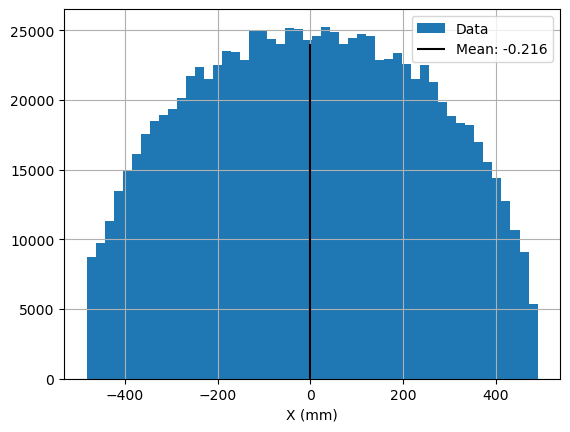

In [6]:
#Histograma de la variable X de todos los eventos
kdst['X'].hist(bins=50, label = 'Data')
plt.vlines(kdst['X'].mean(), 0, 24000, color = 'k', label = f'Mean: {kdst.X.mean():.3f}')
plt.xlabel('X (mm)')
plt.legend()

Text(0.5, 0, 'S2e (pes)')

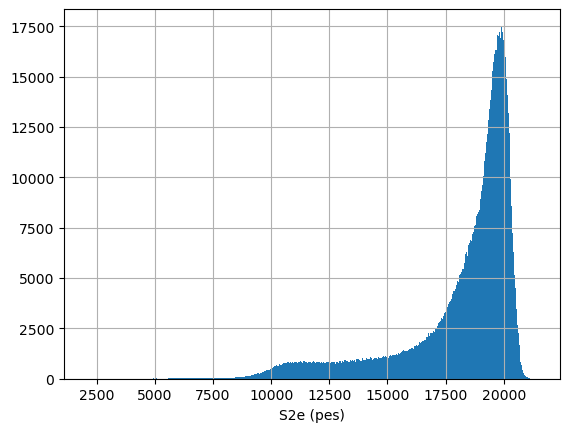

In [7]:
kdst['S2e'].hist(bins=500, label = 'Data')
plt.xlabel('S2e (pes)')

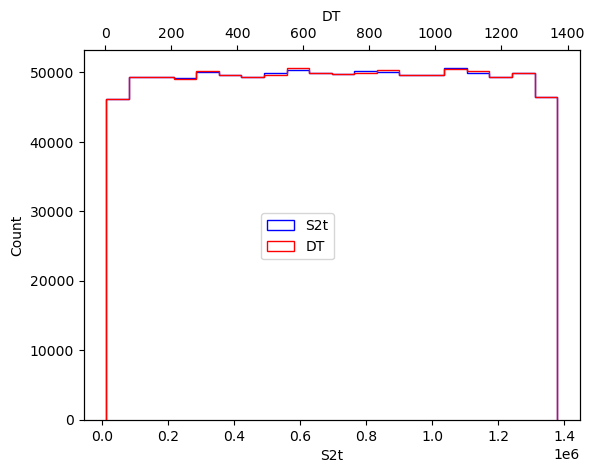

In [8]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Histograma de S2t

ax1.hist(kdst['S2t'], bins=20, histtype='step', color='b', label = 'S2t')
ax1.set_xlabel('S2t')
ax1.set_ylabel('Count')

# Hacemos una copia de ax1 manteniendo el eje Y pero haciendo un nuevo eje X
ax2 = ax1.twiny()

# Histograma de DT
ax2.hist(kdst['DT'], bins=20, histtype='step', color='r', label = 'DT');
ax2.set_xlabel('DT')
fig.legend(loc='center')

(No se ven por separado porque están casi perfectamente solapadas)

Vamos a calcular las distribuciones de S1 y S2 ( $\epsilon$, $\omega$, h (altura))

Las columnas previas que nos interesaban eran: dst[['S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'qmax', 'Nsipm']]

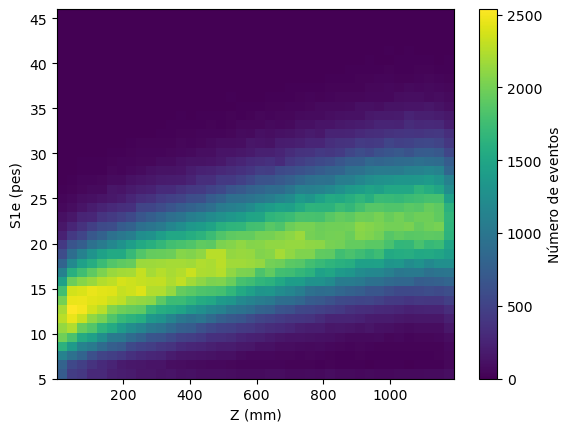

In [12]:
plt.hist2d(kdst['Z'], kdst['S1e'], bins=[40, 40]);
plt.xlabel('Z (mm)')
plt.ylabel('S1e (pes)')
cbar = plt.colorbar()
cbar.set_label('Número de eventos')

Puedes ver la distribución de los eventos en el plano XY con un histograma en 2 dimensiones: 

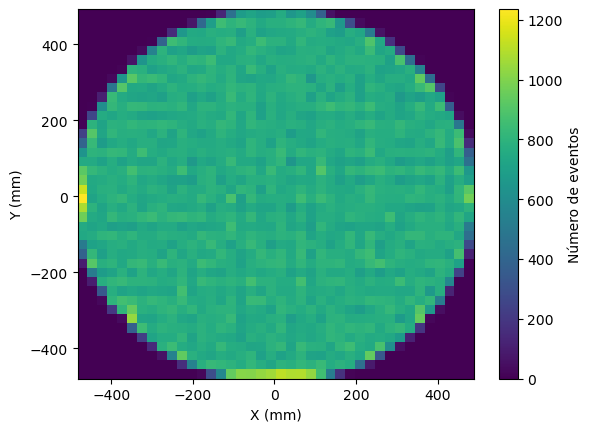

In [14]:
plt.hist2d(kdst['X'], kdst['Y'], bins=[40, 40]);
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
cbar = plt.colorbar()
cbar.set_label('Número de eventos')

S1 se mide a la derecha del detector, entonces los S2, señales grandes, descienden con DT. Se puede ver en la gráfica de S1e y S2e con z. (z equivale a DT).

## 2

In [17]:
max(kdst['DT'])

1368.4951171875

## S1e vs DT

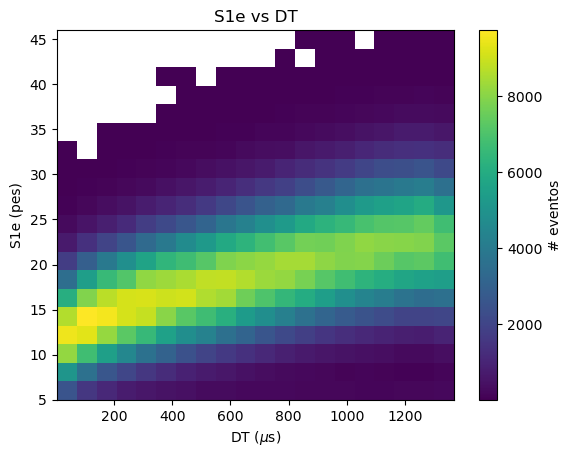

In [19]:
#Filtramos por radio
#kdst = kdst[kdst.R <= 75]

plt.hist2d(kdst['DT'], kdst['S1e'], bins=[20, 20], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S1e (pes)')
plt.title('S1e vs DT')

cbar = plt.colorbar()
cbar.set_label('# eventos')

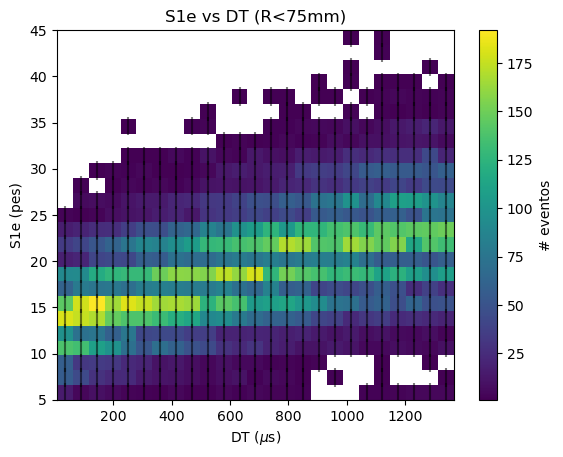

In [20]:
kdst75 = kdst[kdst.R <= 75]

# Crear histograma 2D
counts, xedges, yedges = np.histogram2d(kdst75['DT'], kdst75['S1e'], bins=[25, 25])

# Obtener los centros de los bins
xcenter = 0.5 * (xedges[:-1] + xedges[1:])
ycenter = 0.5 * (yedges[:-1] + yedges[1:])

plt.hist2d(kdst75['DT'], kdst75['S1e'], bins=[25, 25], cmin=1)

# Defino el tamaño de la barra de error en función del tamaño del bin
#xerr = 0.5 * (xedges[1] - xedges[0]) 
#yerr = 0.5 * (yedges[1] - yedges[0])  
xerr=10**(-5)  # Error en DT
yerr=1         # Error en S1e


# Agregar barras de error a cada centro de bin
for i in range(len(xcenter)):
    for j in range(len(ycenter)):
        if counts[i, j] > 0: #añade el error cuando el bin>1
            plt.errorbar(xcenter[i], ycenter[j], xerr=xerr, yerr=yerr, fmt='none', color='black', alpha=0.5)

plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S1e (pes)')
plt.title('S1e vs DT (R<75mm)')

cbar = plt.colorbar()
cbar.set_label('# eventos')

## S2e vs DT

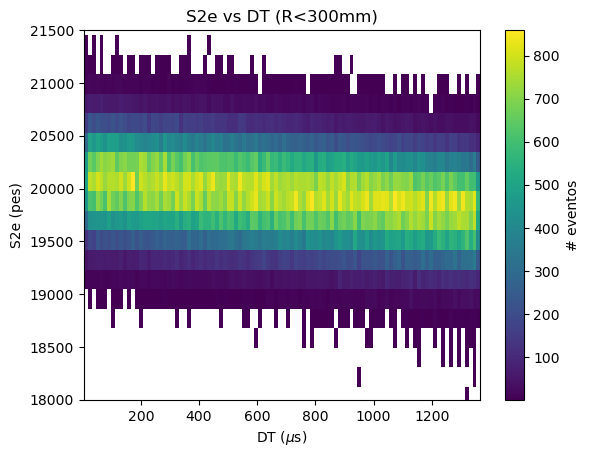

In [22]:
#Filtramos por radio
kdst300 = kdst[kdst.R <= 300]

plt.hist2d(kdst300['DT'], kdst300['S2e'], bins=[100, 100], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S2e (pes)')
plt.ylim(18000,21500)
plt.title('S2e vs DT (R<300mm)')

cbar = plt.colorbar()
cbar.set_label('# eventos')

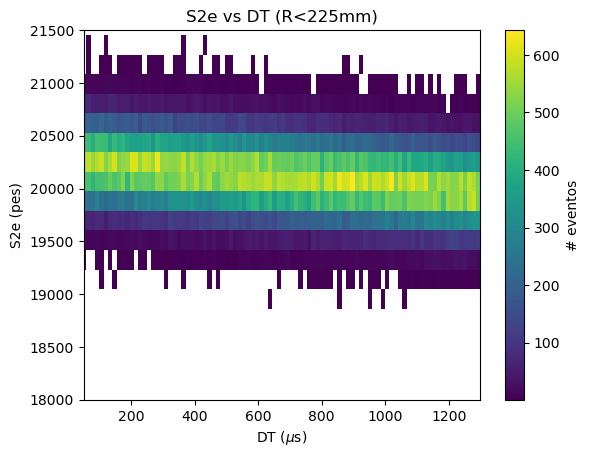

In [23]:
#Filtramos por radio
kdst225 = kdst[kdst.R <= 225]

plt.hist2d(kdst225['DT'], kdst225['S2e'], bins=[100, 100], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S2e (pes)')
plt.xlim(50,1300) #supongo q los valores extremos se desprecian
plt.ylim(18000,21500)
plt.title('S2e vs DT (R<225mm)')


cbar = plt.colorbar()
cbar.set_label('# eventos')

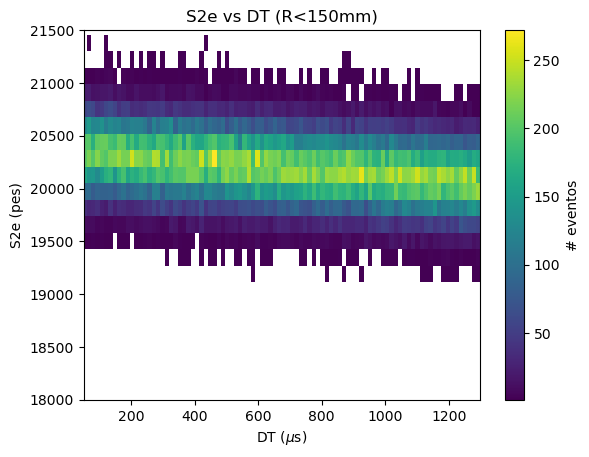

In [24]:
#Filtramos por radio
kdst150 = kdst[kdst.R <= 150]

plt.hist2d(kdst150['DT'], kdst150['S2e'], bins=[100, 100], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S2e (pes)')
plt.xlim(50,1300) #supongo q los valores extremos se desprecian
plt.ylim(18000,21500)
plt.title('S2e vs DT (R<150mm)')

cbar = plt.colorbar()
cbar.set_label('# eventos')

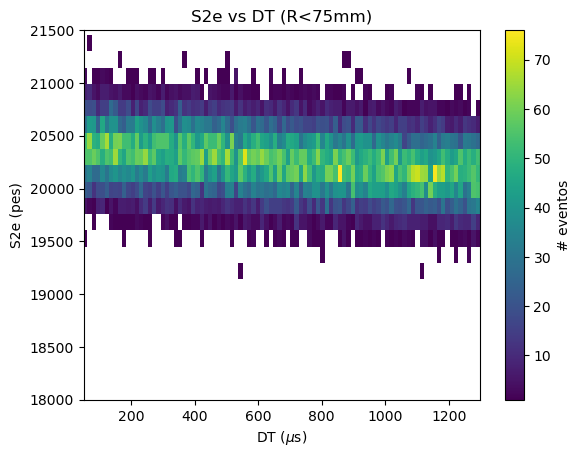

In [25]:
#Filtramos por radio
kdst75 = kdst[kdst.R <= 75]

plt.hist2d(kdst75['DT'], kdst75['S2e'], bins=[100, 100], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S2e (pes)')
plt.xlim(50,1300) #supongo q los valores extremos se desprecian
plt.ylim(18000,21500)
plt.title('S2e vs DT (R<75mm)')

cbar = plt.colorbar()
cbar.set_label('# eventos')

## w,h,q, s2t

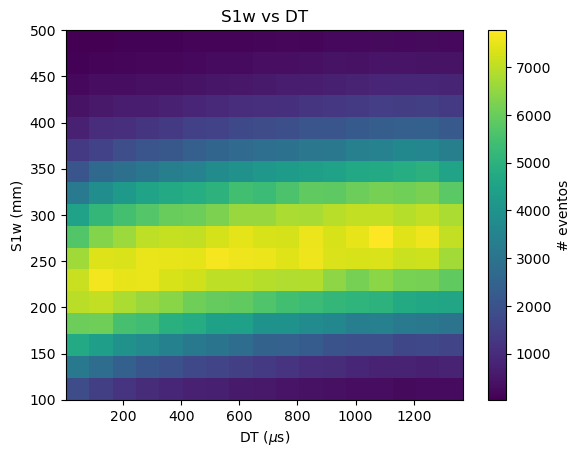

In [27]:
#Filtramos por radio
#kdst = kdst[kdst.R <= 75]

plt.hist2d(kdst['DT'], kdst['S1w'], bins=[17, 17], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S1w (mm)')
plt.title('S1w vs DT')

cbar = plt.colorbar()
cbar.set_label('# eventos')

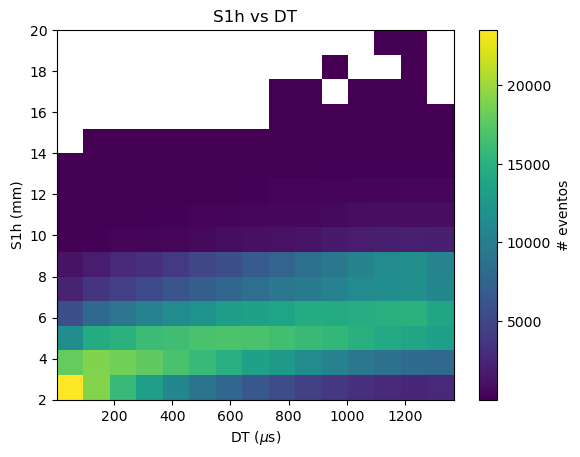

In [28]:
#Filtramos por radio
#kdst = kdst[kdst.R <= 75]

plt.hist2d(kdst['DT'], kdst['S1h'], bins=[15, 15], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S1h (mm)')
plt.title('S1h vs DT')

cbar = plt.colorbar()
cbar.set_label('# eventos')

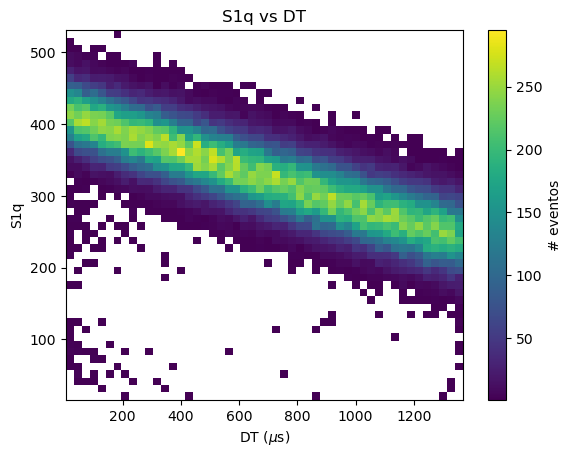

In [29]:
#Filtramos por radio
kdst150 = kdst[kdst.R <= 150]

plt.hist2d(kdst150['DT'], kdst150['S2q'], bins=[50, 50], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S1q')
plt.title('S1q vs DT')

cbar = plt.colorbar()
cbar.set_label('# eventos')

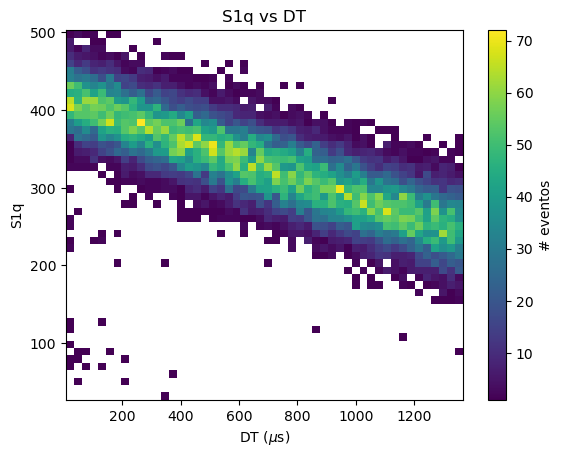

In [30]:
#Filtramos por radio
kdst75 = kdst[kdst.R <= 75]

plt.hist2d(kdst75['DT'], kdst75['S2q'], bins=[50, 50], cmin=1)
plt.xlabel('DT ($\\mu$s)')
plt.ylabel('S1q')
plt.title('S1q vs DT')

cbar = plt.colorbar()
cbar.set_label('# eventos')

Correlación de S2t con Dt. S1t no varía pq es una simulación

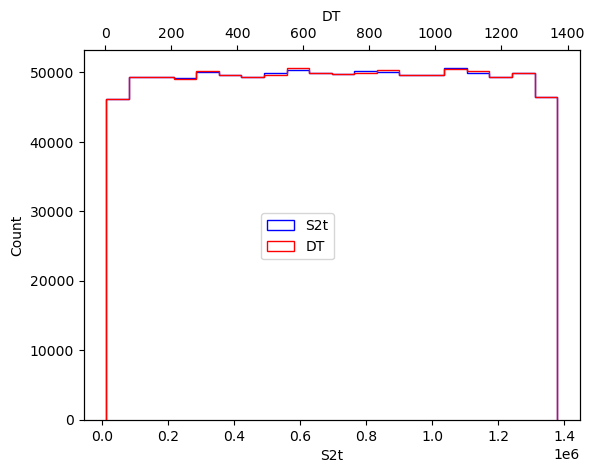

In [32]:
fig, ax1 = plt.subplots()

# Histograma de S2t
ax1.hist(kdst['S2t'], bins=20, histtype='step', color='b', label = 'S2t')
ax1.set_xlabel('S2t')
ax1.set_ylabel('Count')

# Hacemos una copia de ax1 manteniendo el eje Y pero haciendo un nuevo eje X
ax2 = ax1.twiny()

# Histograma de DT
ax2.hist(kdst['DT'], bins=20, histtype='step', color='r', label = 'DT');
ax2.set_xlabel('DT')
fig.legend(loc='center')

## 3

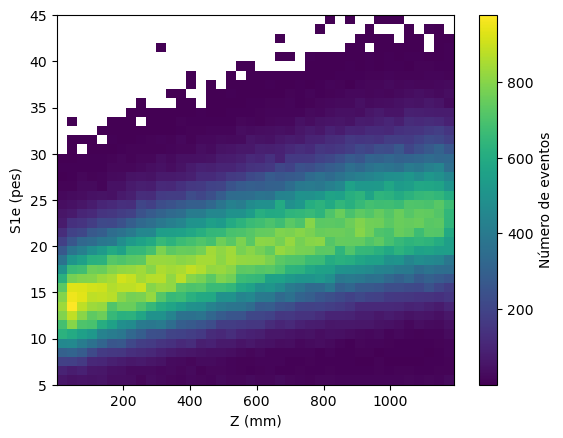

In [34]:
# subdidividir 300mm y anillo esterno
kdst300 = kdst[kdst.R <= 300]
plt.hist2d(kdst300['Z'], kdst300['S1e'], bins=[40, 40], cmin=1);
plt.xlabel('Z (mm)')
plt.ylabel('S1e (pes)')
cbar = plt.colorbar()
cbar.set_label('Número de eventos')


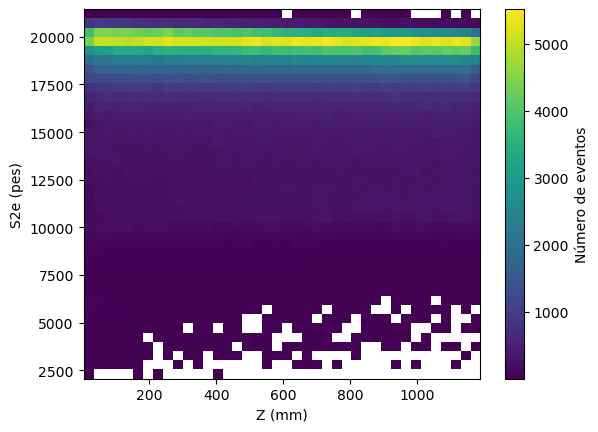

In [35]:
#profile: bins 20, medias errores y ajuste a retas
#comparar Mc
plt.hist2d(kdst['Z'], kdst['S2e'], bins=[40, 40], cmin=1);
plt.xlabel('Z (mm)')
plt.ylabel('S2e (pes)')
cbar = plt.colorbar()
cbar.set_label('Número de eventos')


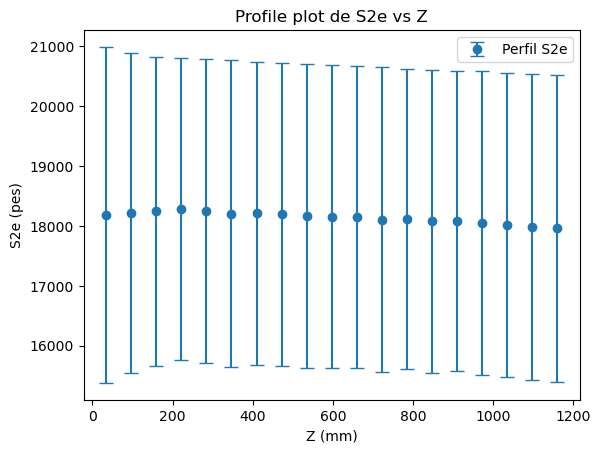

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic

Z = kdst['Z']
S2e = kdst['S2e']

# Definir bins en Z
num_bins = 20
bins = np.linspace(Z.min(), Z.max(), num_bins)

# Calcular la media y la desviación estándar de S2e en cada bin de Z
mean_S2e, _, _ = binned_statistic(Z, S2e, statistic='mean', bins=bins)
std_S2e, _, _ = binned_statistic(Z, S2e, statistic='std', bins=bins)

# Centro de cada bin para graficar
bin_centers = (bins[:-1] + bins[1:]) / 2

# Graficar
plt.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
plt.xlabel('Z (mm)')
plt.ylabel('S2e (pes)')
plt.title('Profile plot de S2e vs Z')
plt.legend()
plt.show()


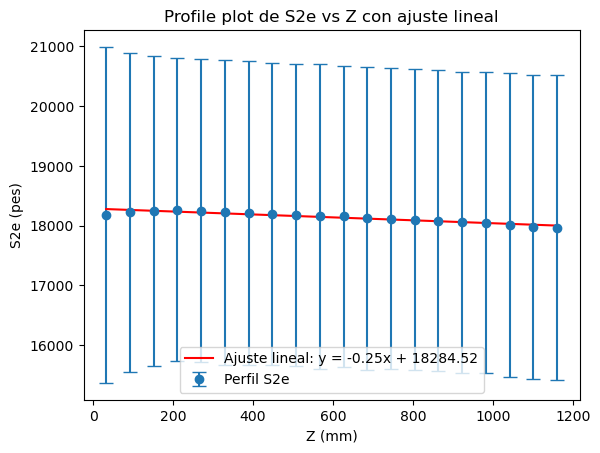

In [37]:
import numpy as np
import matplotlib.pyplot as plt


# Definir bins en Z
num_bins = 20
bins = np.linspace(Z.min(), Z.max(), num_bins + 1)  # Crear los bordes de los bins
bin_centers = (bins[:-1] + bins[1:]) / 2  # Centros de cada bin

# Inicializar listas para las medias y desviaciones estándar
mean_S2e = []
std_S2e = []

# Agrupar manualmente los valores en los bins
for i in range(num_bins):
    mask = (Z >= bins[i]) & (Z < bins[i + 1])  # Seleccionar valores en el bin
    S2e_in_bin = S2e[mask]  # Extraer los valores correspondientes
    
    if len(S2e_in_bin) > 0:
        mean_S2e.append(np.mean(S2e_in_bin))
        std_S2e.append(np.std(S2e_in_bin))
    else:
        mean_S2e.append(np.nan)  # Para evitar problemas si un bin queda vacío
        std_S2e.append(np.nan)

# Convertir a arrays de numpy y eliminar valores NaN
bin_centers = np.array(bin_centers)
mean_S2e = np.array(mean_S2e)
std_S2e = np.array(std_S2e)

valid_mask = ~np.isnan(mean_S2e)  # Filtrar valores válidos
bin_centers_valid = bin_centers[valid_mask]
mean_S2e_valid = mean_S2e[valid_mask]

# Ajuste lineal (recta)
m, b = np.polyfit(bin_centers_valid, mean_S2e_valid, 1)  # Ajuste de primer grado
fit_line = m * bin_centers + b  # Recta ajustada

# Graficar el perfil con barras de error y la recta ajustada
plt.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
plt.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
plt.xlabel('Z (mm)')
plt.ylabel('S2e (pes)')
plt.title('Profile plot de S2e vs Z con ajuste lineal')
plt.legend()
plt.show()


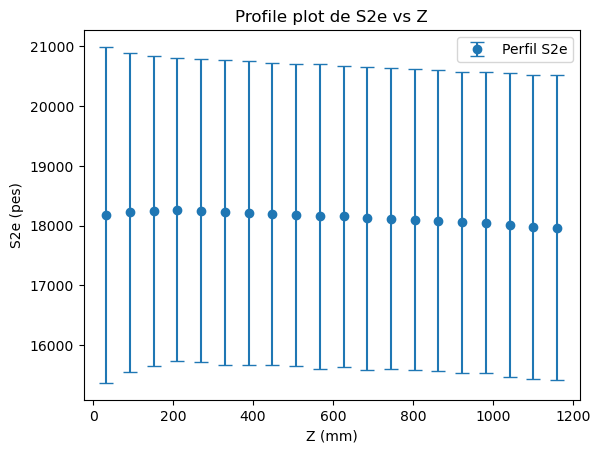

In [38]:
import numpy as np
import matplotlib.pyplot as plt


# Definir bins en Z
num_bins = 20
bins = np.linspace(Z.min(), Z.max(), num_bins + 1)  # Crear los bordes de los bins
bin_centers = (bins[:-1] + bins[1:]) / 2  # Centros de cada bin

# Inicializar listas para las medias y desviaciones estándar
mean_S2e = []
std_S2e = []

# Agrupar manualmente los valores en los bins
for i in range(num_bins):
    mask = (Z >= bins[i]) & (Z < bins[i + 1])  # Seleccionar valores en el bin
    S2e_in_bin = S2e[mask]  # Extraer los valores correspondientes
    
    if len(S2e_in_bin) > 0:
        mean_S2e.append(np.mean(S2e_in_bin))
        std_S2e.append(np.std(S2e_in_bin))
    else:
        mean_S2e.append(np.nan)  # Para evitar problemas si un bin queda vacío
        std_S2e.append(np.nan)

# Convertir a arrays de numpy
mean_S2e = np.array(mean_S2e)
std_S2e = np.array(std_S2e)

# Graficar el perfil con barras de error
plt.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
plt.xlabel('Z (mm)')
plt.ylabel('S2e (pes)')
plt.title('Profile plot de S2e vs Z')
plt.legend()
plt.show()


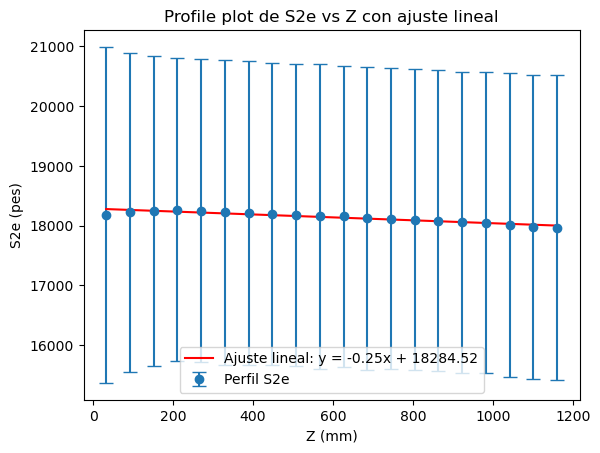

In [39]:
import numpy as np
import matplotlib.pyplot as plt



# Definir bins en Z
num_bins = 20
bins = np.linspace(Z.min(), Z.max(), num_bins + 1)  # Crear los bordes de los bins
bin_centers = (bins[:-1] + bins[1:]) / 2  # Centros de cada bin

# Inicializar listas para las medias y desviaciones estándar
mean_S2e = []
std_S2e = []

# Agrupar manualmente los valores en los bins
for i in range(num_bins):
    mask = (Z >= bins[i]) & (Z < bins[i + 1])  # Seleccionar valores en el bin
    S2e_in_bin = S2e[mask]  # Extraer los valores correspondientes
    
    if len(S2e_in_bin) > 0:
        mean_S2e.append(np.mean(S2e_in_bin))
        std_S2e.append(np.std(S2e_in_bin))
    else:
        mean_S2e.append(np.nan)  # Para evitar problemas si un bin queda vacío
        std_S2e.append(np.nan)

# Convertir a arrays de numpy y eliminar valores NaN
bin_centers = np.array(bin_centers)
mean_S2e = np.array(mean_S2e)
std_S2e = np.array(std_S2e)

valid_mask = ~np.isnan(mean_S2e)  # Filtrar valores válidos
bin_centers_valid = bin_centers[valid_mask]
mean_S2e_valid = mean_S2e[valid_mask]

# Ajuste lineal (recta)
m, b = np.polyfit(bin_centers_valid, mean_S2e_valid, 1)  # Ajuste de primer grado
fit_line = m * bin_centers + b  # Recta ajustada

# Graficar el perfil con barras de error y la recta ajustada
plt.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
plt.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
plt.xlabel('Z (mm)')
plt.ylabel('S2e (pes)')
plt.title('Profile plot de S2e vs Z con ajuste lineal')
plt.legend()
plt.show()


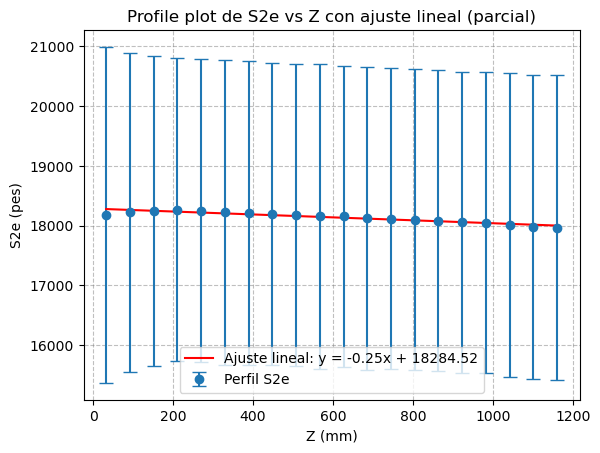

In [40]:
Z = kdst['Z']
S2e = kdst['S2e']

# Definir bins en Z
num_bins = 20
bins = np.linspace(Z.min(), Z.max(), num_bins + 1)  # Crear los bordes de los bins
bin_centers = (bins[:-1] + bins[1:]) / 2  # Centros de cada bin

# Inicializar listas para las medias y desviaciones estándar
mean_S2e = []
std_S2e = []

# Agrupar manualmente los valores en los bins
for i in range(num_bins):
    mask = (Z >= bins[i]) & (Z < bins[i + 1])  # Seleccionar valores en el bin
    S2e_in_bin = S2e[mask]  # Extraer los valores correspondientes
    
    if len(S2e_in_bin) > 0:
        mean_S2e.append(np.mean(S2e_in_bin))
        std_S2e.append(np.std(S2e_in_bin))
    else:
        mean_S2e.append(np.nan)  # Para evitar problemas si un bin queda vacío
        std_S2e.append(np.nan)

# Convertir a arrays de numpy y eliminar valores NaN
bin_centers = np.array(bin_centers)
mean_S2e = np.array(mean_S2e)
std_S2e = np.array(std_S2e)

valid_mask = ~np.isnan(mean_S2e)  # Filtrar valores válidos
bin_centers_valid = bin_centers[valid_mask]
mean_S2e_valid = mean_S2e[valid_mask]

# Ajuste lineal (recta)
m, b = np.polyfit(bin_centers_valid, mean_S2e_valid, 1)  # Ajuste de primer grado
fit_line = m * bin_centers + b  # Recta ajustada

# Graficar el perfil con barras de error y la recta ajustada
plt.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
plt.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
plt.xlabel('Z (mm)')
plt.ylabel('S2e (pes)')
plt.title('Profile plot de S2e vs Z con ajuste lineal (parcial)')
plt.legend()
plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)


# Simulación

In [42]:
# sim 1 fast sim 5 bar
# sim 2 full sim 4 bar
# sim 3 fast sim 4 bar

- Simulación 1 => Fast Sim 5 bar

In [44]:
frames = []
for ifile in range(0, 1001): # Bucle para leer cada archivo individualmente  
    file = f'Dorothea/next100_kr83m_dorothea_{ifile}.h5'
    if os.path.exists(file): # En caso de que el path del archivo exista, lo abre como DataFrame 
        #if ifile%100==0: print(f'Abriendo archivo {ifile}')
        dst = pd.DataFrame(tb.open_file(file).root.DST.Events[:]) 
        frames.append(dst) # Guarda cada uno de los DataFrames en una lista
sim1 = pd.concat(frames, ignore_index=True) # Hace un nuevo DataFrame juntando los individuales
sim1 = sim1[sim1.R >= 0] #filtramos pq algunas variables se procesan mal y ponen radio negativo

- Simulación 2 => Full Sim 4 bar

In [46]:
framescompleto = []
for ifile in range(0, 999): # Bucle para leer cada archivo individualmente  
    file = f'SimulacionCompleta/NEXT100_Kr83m_Full_dorothea_{ifile}.h5'
    if os.path.exists(file): # En caso de que el path del archivo exista, lo abre como DataFrame 
        #if ifile%100==0: print(f'Abriendo archivo {ifile}')
        dst = pd.DataFrame(tb.open_file(file).root.DST.Events[:]) 
        framescompleto.append(dst) # Guarda cada uno de los DataFrames en una lista
sim2 = pd.concat(framescompleto, ignore_index=True) # Hace un nuevo DataFrame juntando los individuales
sim2 = sim2[sim2.R >= 0] #filtramos 

- Simulación 3 => Fast Sim 4 bar

In [48]:
df = pd.read_hdf("merged.kdst", "DST/Events")
frames_fast=[]
frames_fast.append(df)
fast = pd.concat(frames_fast)
fast = fast[fast.R >= 0] #filtramos

In [49]:
titulos = ["FAST SIMULATION 5 BAR", "FULL SIMULATION 4 BAR", "FAST SIMULATION 4 BAR"]

# axes[0].set_title(titulos[0])
# axes[1].set_title(titulos[1])
# axes[2].set_title(titulos[2])

# Anillos de S1e vs Z

In [51]:
def plot_profile(R):
    # Bins en R
    num_bins = 20
    bins = np.linspace(R.min(), R.max(), num_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Contar datos en cada bin
    hist_values, _ = np.histogram(R, bins=bins)
    
    return bin_centers, hist_values

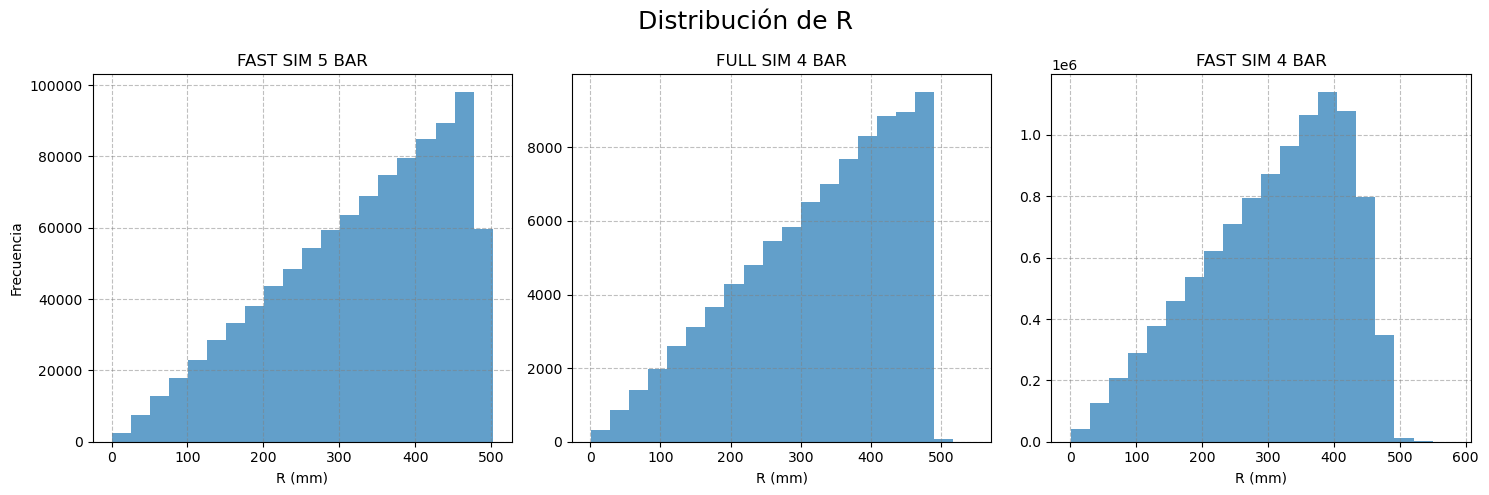

In [52]:
# Distribución de R

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Primer histograma
bin_centers, hist_values = plot_profile(sim1['R'])
ax[0].bar(bin_centers, hist_values, width=(bin_centers[1] - bin_centers[0]), alpha=0.7)
ax[0].set_xlabel('R (mm)')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title("FAST SIM 5 BAR")
# ax[0].legend()
ax[0].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Segundo histograma
bin_centers, hist_values = plot_profile(sim2['R'])
ax[1].bar(bin_centers, hist_values, width=(bin_centers[1] - bin_centers[0]), alpha=0.7)
ax[1].set_xlabel('R (mm)')
#ax[1].set_ylabel('Frecuencia')
ax[1].set_title("FULL SIM 4 BAR")
# ax[1].legend()
ax[1].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Tercer histograma
bin_centers, hist_values = plot_profile(fast['R'])
ax[2].bar(bin_centers, hist_values, width=(bin_centers[1] - bin_centers[0]), alpha=0.7)
ax[2].set_xlabel('R (mm)')
#ax[2].set_ylabel('Frecuencia')
ax[2].set_title("FAST SIM 4 BAR")
# ax[2].legend()
ax[2].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

fig.suptitle('Distribución de R', fontsize=18)
plt.tight_layout()

## Anillo interior vs exterior [0,250] - [250,500] mm

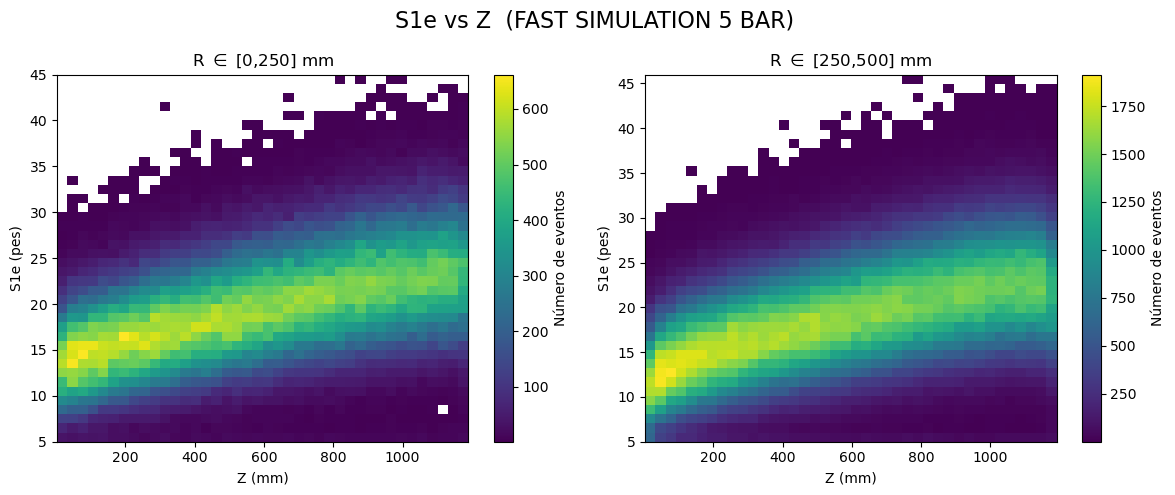

In [54]:
fig, axes= plt.subplots(1,2, figsize=(12,5))
sim1_250 = sim1[(sim1.R > 0) & (sim1.R <= 250)]
h1=axes[0].hist2d(sim1_250['Z'], sim1_250['S1e'], bins=[40, 40], cmin=1);
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
axes[0].set_title("R $\\in$ [0,250] mm")
cbar1 = plt.colorbar(h1[3], ax=axes[0])
cbar1.set_label('Número de eventos')

sim1_500 = sim1[(sim1.R > 250) & (sim1.R <= 500)]
h2=axes[1].hist2d(sim1_500['Z'], sim1_500['S1e'], bins=[40, 40], cmin=1);
axes[1].set_xlabel('Z (mm)')
axes[1].set_ylabel('S1e (pes)')
axes[1].set_title("R $\\in$ [250,500] mm")
cbar2 = plt.colorbar(h2[3], ax=axes[1])
cbar2.set_label('Número de eventos')

fig.suptitle('S1e vs Z  (FAST SIMULATION 5 BAR)', fontsize=16)
plt.tight_layout()

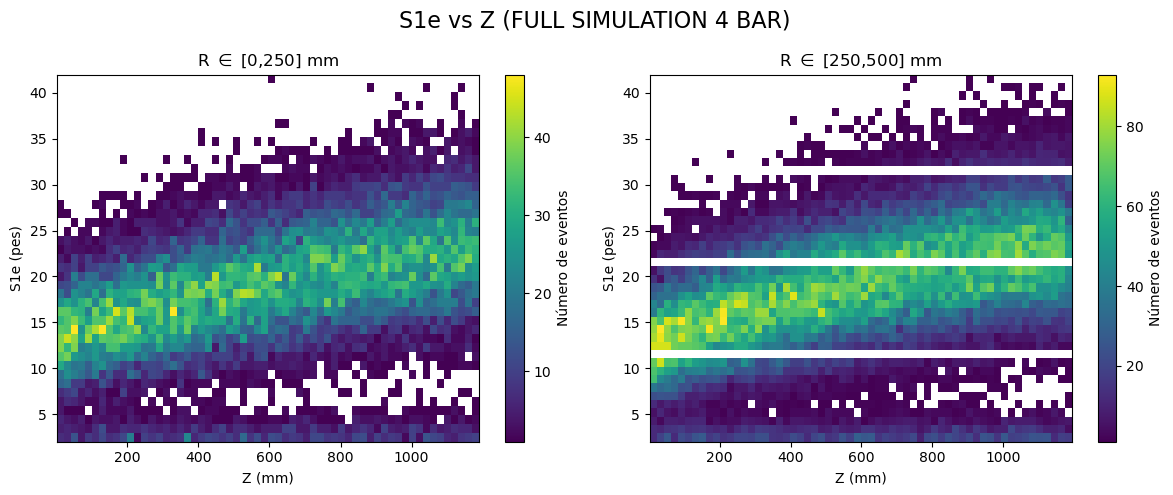

In [55]:
fig, axes= plt.subplots(1,2, figsize=(12,5))
sim2_250 = sim2[(sim2.R > 0) & (sim2.R <= 250)]
h1=axes[0].hist2d(sim2_250['Z'], sim2_250['S1e'], bins=[60, 41], cmin=1);
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
axes[0].set_title("R $\\in$ [0,250] mm")
cbar1 = plt.colorbar(h1[3], ax=axes[0])
cbar1.set_label('Número de eventos')

sim2_500 = sim2[(sim2.R > 250) & (sim2.R <= 440)] # en <450 no crea esa línea
h2=axes[1].hist2d(sim2_500['Z'], sim2_500['S1e'], bins=[60, 44], cmin=1);
axes[1].set_xlabel('Z (mm)')
axes[1].set_ylabel('S1e (pes)')
axes[1].set_title("R $\\in$ [250,500] mm")
cbar2 = plt.colorbar(h2[3], ax=axes[1])
cbar2.set_label('Número de eventos')
fig.suptitle('S1e vs Z (FULL SIMULATION 4 BAR)', fontsize=16)
plt.tight_layout()

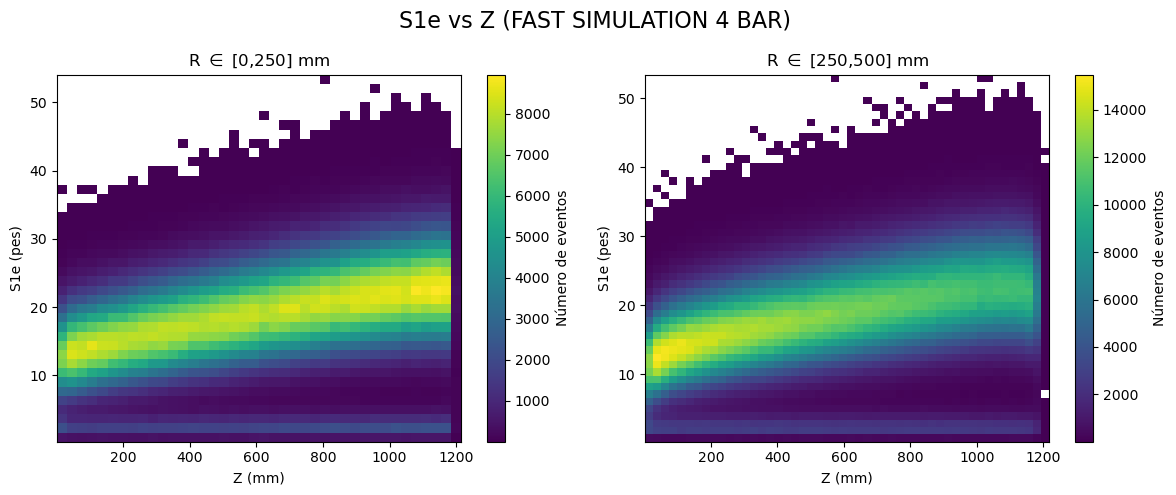

In [56]:
fig, axes= plt.subplots(1,2, figsize=(12,5))
fast_250 = fast[(fast.R > 0) & (fast.R <= 250)]

h1=axes[0].hist2d(fast_250['Z'], fast_250['S1e'], bins=[40, 40], cmin=1);
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
axes[0].set_title("R $\\in$ [0,250] mm")
cbar1 = plt.colorbar(h1[3], ax=axes[0]) 
cbar1.set_label('Número de eventos')

# Externo
fast_500 = fast[(fast.R > 250) & (fast.R <= 500)]
h2=axes[1].hist2d(fast_500['Z'], fast_500['S1e'], bins=[50, 50], cmin=1);
axes[1].set_xlabel('Z (mm)')
axes[1].set_ylabel('S1e (pes)')
axes[1].set_title("R $\\in$ [250,500] mm")
cbar2 = plt.colorbar(h2[3], ax=axes[1]) 
cbar2.set_label('Número de eventos')

fig.suptitle('S1e vs Z (FAST SIMULATION 4 BAR)', fontsize=16)
plt.tight_layout()

In [57]:
titulos = ["FAST SIMULATION 5 BAR", "FULL SIMULATION 4 BAR", "FAST SIMULATION 4 BAR"]

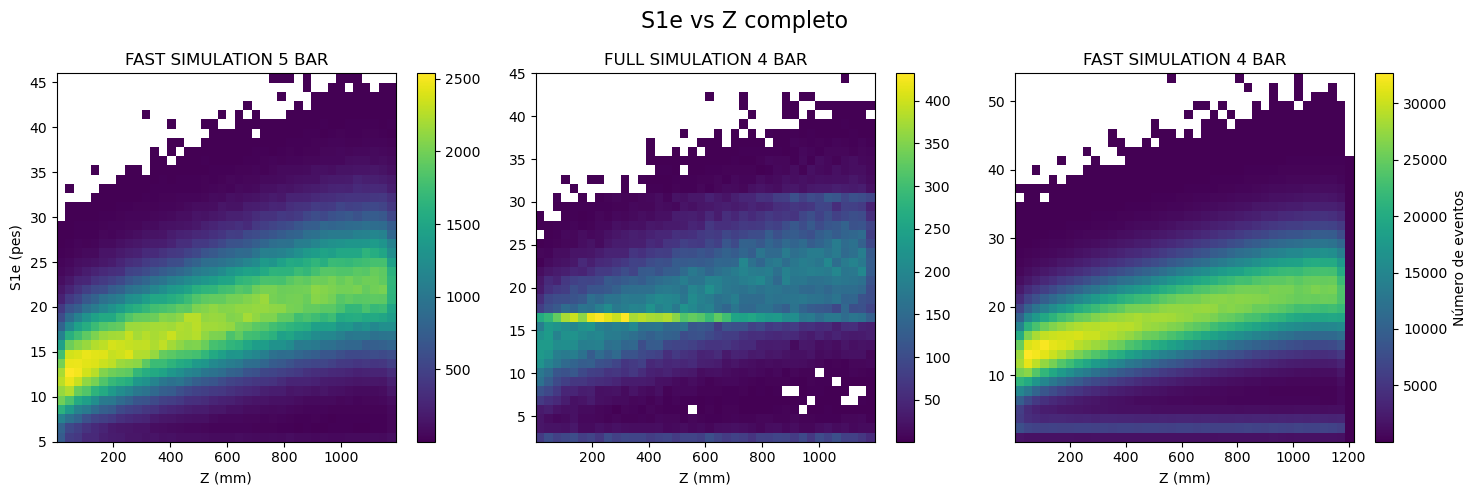

In [58]:
# Datos al completo
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación 1
h1 = axes[0].hist2d(sim1['Z'], sim1['S1e'], bins=[40, 40], cmin=1)
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
axes[0].set_title(titulos[0])
cbar1 = plt.colorbar(h1[3], ax=axes[0])  # Asociar colorbar con la gráfica correcta
#cbar1.set_label('Número de eventos')

# Segunda gráfica: Simulación 2
h2 = axes[1].hist2d(sim2['Z'], sim2['S1e'], bins=[40, 40], cmin=1)
axes[1].set_xlabel('Z (mm)')
#axes[1].set_ylabel('S1e (pes)')
axes[1].set_title(titulos[1])
cbar2 = plt.colorbar(h2[3], ax=axes[1])  # Asociar colorbar con la gráfica correcta
#cbar2.set_label('Número de eventos')

# Tercera gráfica
h3 = axes[2].hist2d(fast['Z'], fast['S1e'], bins=[40, 40], cmin=1)
axes[2].set_xlabel('Z (mm)')
#axes[2].set_ylabel('S1e (pes)')
axes[2].set_title(titulos[2])
cbar3 = plt.colorbar(h3[3], ax=axes[2])  # Asociar colorbar con la gráfica correcta
cbar3.set_label('Número de eventos')


# Ajustar diseño
fig.suptitle('S1e vs Z completo', fontsize=16)
plt.tight_layout()

In [59]:
### Comparación anillo interior

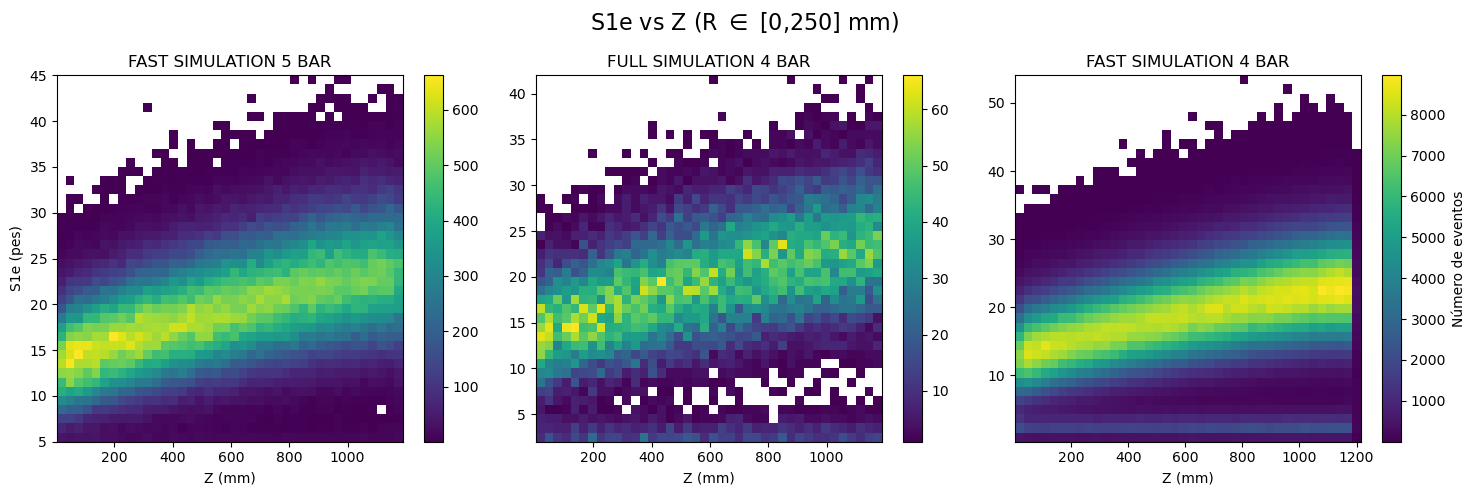

In [60]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación 1
h1 = axes[0].hist2d(sim1_250['Z'], sim1_250['S1e'], bins=[40, 40], cmin=1)
cbar1 = fig.colorbar(h1[3], ax=axes[0])  
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')

# Segunda gráfica: Simulación 2
h2 = axes[1].hist2d(sim2_250['Z'], sim2_250['S1e'], bins=[40, 40], cmin=1)
cbar2 = fig.colorbar(h2[3], ax=axes[1]) 
axes[1].set_xlabel('Z (mm)')

# Tercera gráfica: Fast
h3 = axes[2].hist2d(fast_250['Z'], fast_250['S1e'], bins=[40, 40], cmin=1)
cbar3 = fig.colorbar(h3[3], ax=axes[2])  
axes[2].set_xlabel('Z (mm)')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])
# Etiqueta de la barra de color solo para el último gráfico
cbar3.set_label('Número de eventos')

# Ajustar el diseño para evitar solapamientos
fig.suptitle('S1e vs Z (R $\\in$ [0,250] mm)', fontsize=16)
plt.tight_layout()

In [61]:
# Anillo exterior

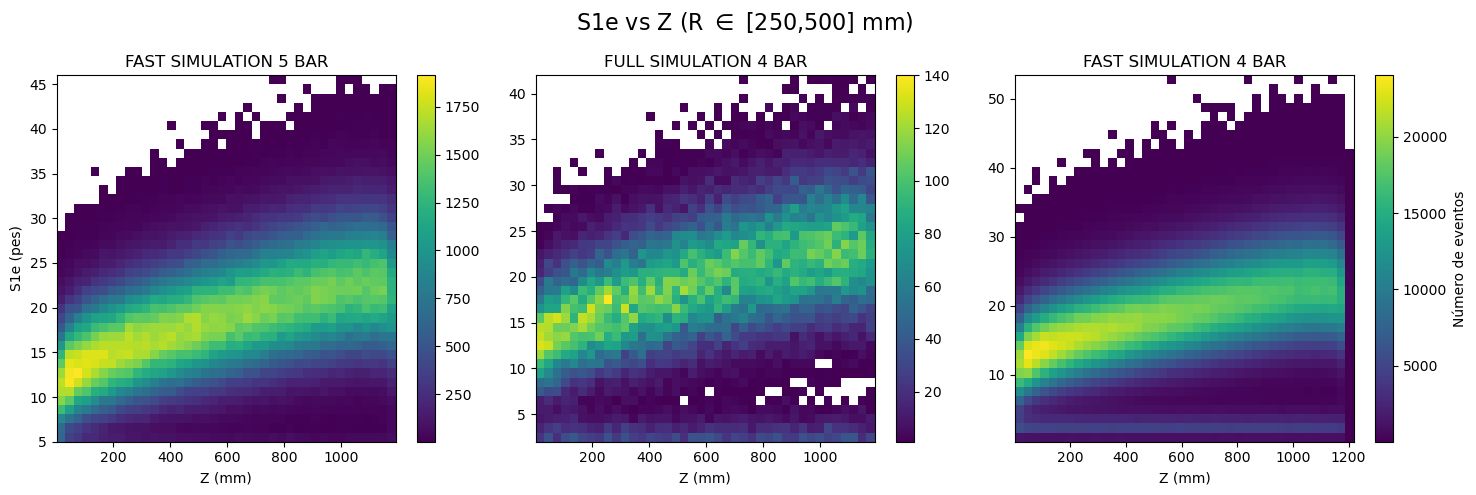

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación Parcial
h1 = axes[0].hist2d(sim1_500['Z'], sim1_500['S1e'], bins=[40, 40], cmin=1)
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
cbar1 = plt.colorbar(h1[3], ax=axes[0])  
#cbar1.set_label('Número de eventos')

# Segunda gráfica: Simulación Completa
h2 = axes[1].hist2d(sim2_500['Z'], sim2_500['S1e'], bins=[40, 40], cmin=1)
axes[1].set_xlabel('Z (mm)')
#axes[1].set_ylabel('S1e (pes)')
cbar2 = plt.colorbar(h2[3], ax=axes[1])  
#cbar2.set_label('Número de eventos')

# Tercera
h3 = axes[2].hist2d(fast_500['Z'], fast_500['S1e'], bins=[40, 40], cmin=1)
axes[2].set_xlabel('Z (mm)')
#axes[2].set_ylabel('S1e (pes)')
cbar3 = plt.colorbar(h3[3], ax=axes[2]) 
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar diseño
fig.suptitle('S1e vs Z (R $\\in$ [250,500] mm)', fontsize=16)
plt.tight_layout()

La línea de la Sim 2 ocurre para R > 450 mm

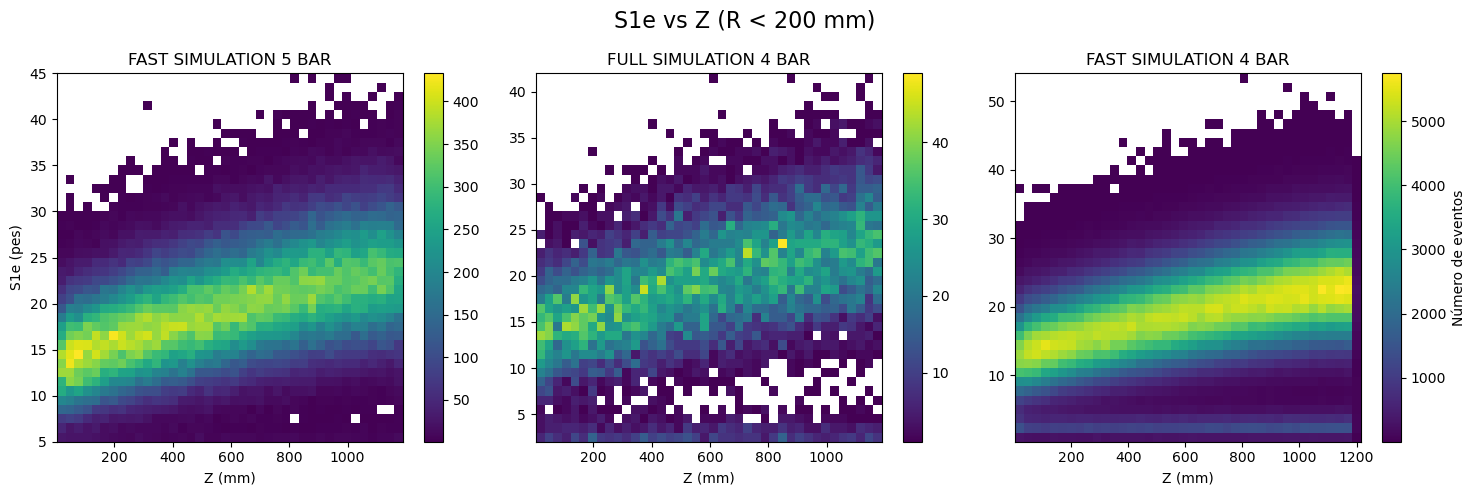

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sim1_200 = sim1[(sim1.R > 0) & (sim1.R <= 200)]
sim2_200 = sim2[(sim2.R > 0) & (sim2.R <= 200)]
fast_200 = fast[(fast.R > 0) & (fast.R <= 200)]


# Primera gráfica: Simulación Parcial
h1 = axes[0].hist2d(sim1_200['Z'], sim1_200['S1e'], bins=[40, 40], cmin=1)
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
cbar1 = plt.colorbar(h1[3], ax=axes[0])  
#cbar1.set_label('Número de eventos')

# Segunda gráfica: Simulación Completa
h2 = axes[1].hist2d(sim2_200['Z'], sim2_200['S1e'], bins=[40, 40], cmin=1)
axes[1].set_xlabel('Z (mm)')
#axes[1].set_ylabel('S1e (pes)')
cbar2 = plt.colorbar(h2[3], ax=axes[1])  
#cbar2.set_label('Número de eventos')

# Tercera
h3 = axes[2].hist2d(fast_200['Z'], fast_200['S1e'], bins=[40, 40], cmin=1)
axes[2].set_xlabel('Z (mm)')
#axes[2].set_ylabel('S1e (pes)')
cbar3 = plt.colorbar(h3[3], ax=axes[2]) 
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar diseño
fig.suptitle('S1e vs Z (R < 200 mm)', fontsize=16)
plt.tight_layout()

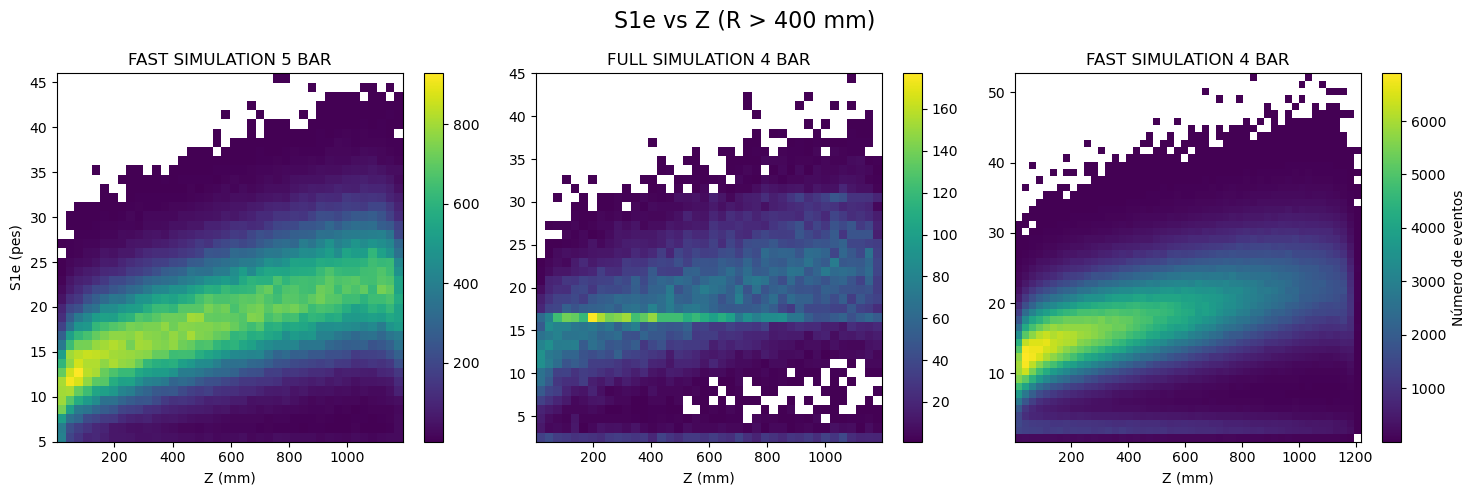

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sim1_400 = sim1[(sim1.R > 400) ]
sim2_400 = sim2[(sim2.R > 400) ]
fast_400 = fast[(fast.R > 400) ]


# Primera gráfica: Simulación Parcial
h1 = axes[0].hist2d(sim1_400['Z'], sim1_400['S1e'], bins=[40, 40], cmin=1)
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S1e (pes)')
cbar1 = plt.colorbar(h1[3], ax=axes[0])  
#cbar1.set_label('Número de eventos')

# Segunda gráfica: Simulación Completa
h2 = axes[1].hist2d(sim2_400['Z'], sim2_400['S1e'], bins=[40, 40], cmin=1)
axes[1].set_xlabel('Z (mm)')
#axes[1].set_ylabel('S1e (pes)')
cbar2 = plt.colorbar(h2[3], ax=axes[1])  
#cbar2.set_label('Número de eventos')

# Tercera
h3 = axes[2].hist2d(fast_400['Z'], fast_400['S1e'], bins=[50, 50], cmin=1)
axes[2].set_xlabel('Z (mm)')
#axes[2].set_ylabel('S1e (pes)')
cbar3 = plt.colorbar(h3[3], ax=axes[2]) 
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar diseño
fig.suptitle('S1e vs Z (R > 400 mm)', fontsize=16)
plt.tight_layout()

## Profile S1e vs Z

# S2e vs Z

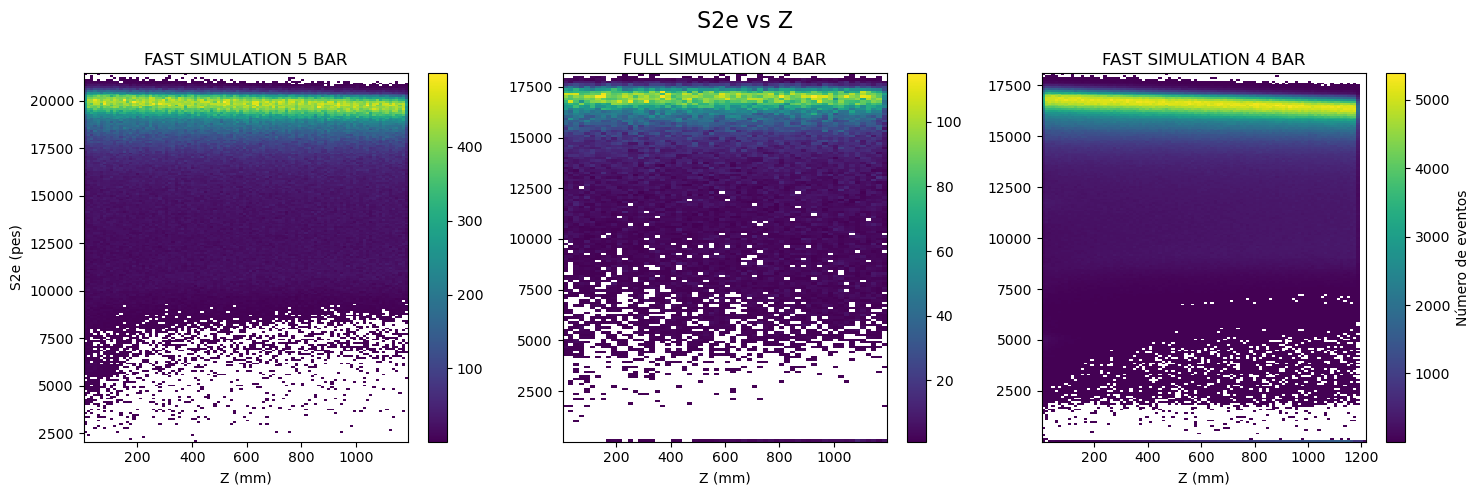

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación Parcial
plt.ylim(12500,22000)
h1 = axes[0].hist2d(sim1['Z'], sim1['S2e'], bins=[100, 200], cmin=1)
axes[0].set_xlabel('Z (mm)')
axes[0].set_ylabel('S2e (pes)')
axes[0].set_title(titulos[0])
# axes[0].set_ylim(17500,21500)
cbar1 = plt.colorbar(h1[3], ax=axes[0])  # Asociar colorbar con la gráfica correcta
#cbar1.set_label('Número de eventos')

# Segunda gráfica: Simulación Completa
h2 = axes[1].hist2d(sim2['Z'], sim2['S2e'], bins=[60, 150], cmin=1)
axes[1].set_xlabel('Z (mm)')
#axes[1].set_ylabel('S2e (pes)')
axes[1].set_title(titulos[1])
# axes[1].set_ylim(14000,18000)
cbar2 = plt.colorbar(h2[3], ax=axes[1])  # Asociar colorbar con la gráfica correcta
#cbar2.set_label('Número de eventos')

# Fast
h3 = axes[2].hist2d(fast['Z'], fast['S2e'], bins=[100, 200], cmin=1)
axes[2].set_xlabel('Z (mm)')
#axes[2].set_ylabel('S2e (pes)')
axes[2].set_title(titulos[2])
# axes[2].set_ylim(14500,18000)
cbar3 = plt.colorbar(h3[3], ax=axes[2])
cbar3.set_label('Número de eventos')

# Ajustar diseño
fig.suptitle('S2e vs Z', fontsize=16)
plt.tight_layout()

In [69]:
# fig, axes = plt.subplots(3, 1, figsize=(15, 11))

# # Primera gráfica: Simulación Parcial
# h1 = axes[0].hist2d(sim1['Z'], sim1['S2e'], bins=[100, 200], cmin=1)
# axes[0].set_xlabel('Z (mm)')
# axes[0].set_ylabel('S2e (pes)')
# axes[0].set_title(titulos[0])
# axes[0].set_ylim(18000,21500)
# cbar1 = plt.colorbar(h1[3], ax=axes[0])  # Asociar colorbar con la gráfica correcta
# cbar1.set_label('Número de eventos')

# # Segunda gráfica: Simulación Completa
# h2 = axes[1].hist2d(sim2['Z'], sim2['S2e'], bins=[100, 200], cmin=1)
# axes[1].set_xlabel('Z (mm)')
# axes[1].set_ylabel('S2e (pes)')
# axes[1].set_title(titulos[1])
# axes[1].set_ylim(15000,18000)
# cbar2 = plt.colorbar(h2[3], ax=axes[1])  # Asociar colorbar con la gráfica correcta
# cbar2.set_label('Número de eventos')

# # Fast
# h3 = axes[2].hist2d(fast['Z'], fast['S2e'], bins=[100, 200], cmin=1)
# axes[2].set_xlabel('Z (mm)')
# axes[2].set_ylabel('S2e (pes)')
# axes[2].set_title(titulos[2])
# axes[2].set_ylim(15000,18000)
# cbar3 = plt.colorbar(h3[3], ax=axes[2])
# cbar3.set_label('Número de eventos')

# # Ajustar diseño
# fig.suptitle('S2e vs Z', fontsize=16)

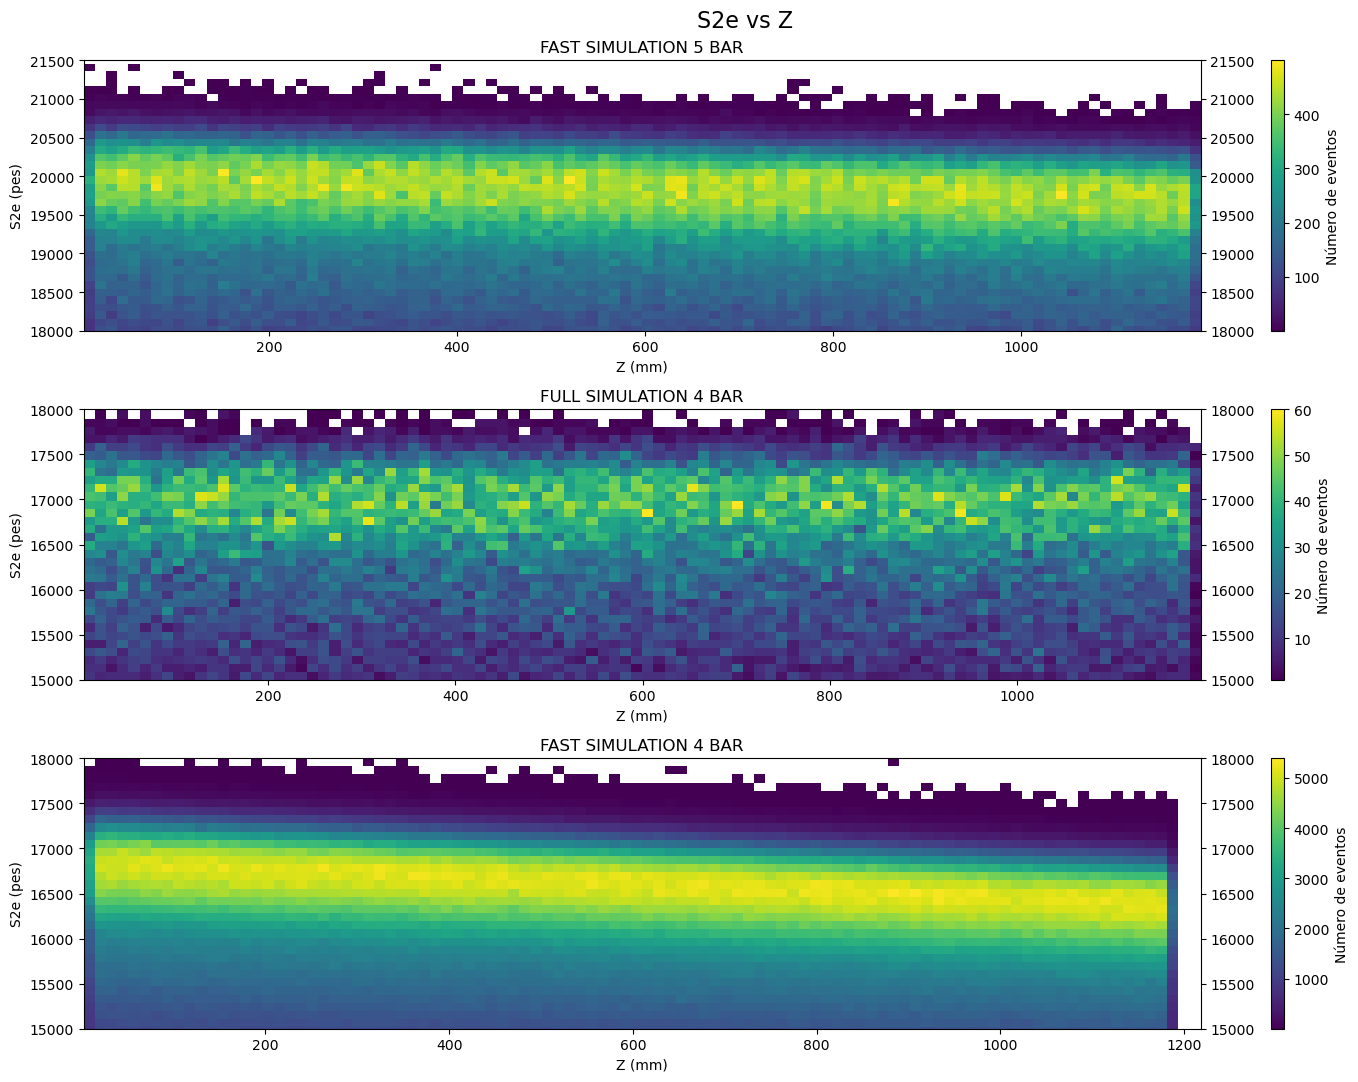

In [70]:
fig, axes = plt.subplots(3, 1, figsize=(15, 11))

# Datos y configuraciones
datos = [
    (sim1['Z'], sim1['S2e'], (18000, 21500)),
    (sim2['Z'], sim2['S2e'], (15000, 18000)),
    (fast['Z'], fast['S2e'], (15000, 18000))
]

# Graficar en bucle
for i, ax in enumerate(axes):
    Z, S2e, ylim = datos[i]
    h = ax.hist2d(Z, S2e, bins=[100, 200], cmin=1)
    ax.set_xlabel('Z (mm)')
    ax.set_ylabel('S2e (pes)')
    ax.set_title(titulos[i])
    ax.set_ylim(*ylim)

    # Duplicar ticks y etiquetas del eje Y a la derecha
    ax.yaxis.set_ticks_position('both')
    ax.tick_params(axis='y', labelright=True)

    # Colorbar asociado
    cbar = plt.colorbar(h[3], ax=ax)
    cbar.set_label('Número de eventos')

# Título general y diseño
fig.suptitle('S2e vs Z', fontsize=16)
plt.tight_layout()


## PROFILE y=mx+b

In [72]:
def plot_profile(Z, S2e):
    # Bins en Z
    num_bins = 20
    bins = np.linspace(Z.min(), Z.max(), num_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    # Listas para medias y desviaciones estándar
    mean_S2e, std_S2e = [], []

    # Agrupar datos en bins
    for i in range(num_bins):
        mask = (Z >= bins[i]) & (Z < bins[i + 1])
        S2e_in_bin = S2e[mask]
        
        if len(S2e_in_bin) > 0:
            mean_S2e.append(np.mean(S2e_in_bin))
            std_S2e.append(np.std(S2e_in_bin)/np.sqrt(len(S2e_in_bin))) #revisar def
        else:
            mean_S2e.append(np.nan)
            std_S2e.append(np.nan)

    # Convertir a arrays y filtrar NaNs
    bin_centers = np.array(bin_centers)
    mean_S2e = np.array(mean_S2e)
    std_S2e = np.array(std_S2e)
    valid_mask = ~np.isnan(mean_S2e)

    # Ajuste lineal y=mx+b
    m, b = np.polyfit(bin_centers[valid_mask], mean_S2e[valid_mask], 1)
    fit_line = m * bin_centers + b

    return bin_centers, mean_S2e, std_S2e, fit_line, m, b

FAST SIMULATION 5 BAR: m = -0.2451, b = 18284.52
FULL SIMULATION 4 BAR: m = -0.3309, b = 15589.15
FAST SIMULATION 4 BAR: m = -0.6070, b = 15388.29


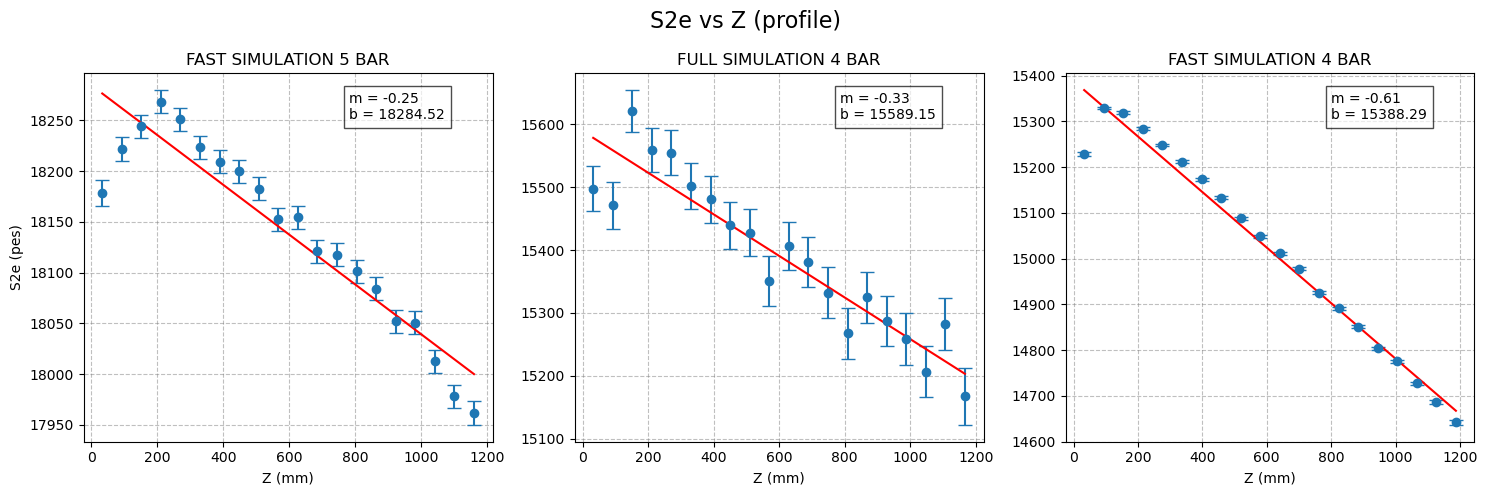

In [73]:
# Crear subfiguras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Lista para guardar m y b
parametros_lineales = []

# Graficar primera subfigura
bin_centers, mean_S2e, std_S2e, fit_line, m, b = plot_profile(sim1['Z'], sim1['S2e'])
ax1.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax1.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('S2e (pes)')
ax1.set_title(titulos[0])
# ax1.legend()
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax1.text(0.65, 0.95, f"m = {m:.2f}\nb = {b:.2f}", transform=ax1.transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
parametros_lineales.append((m, b))

# Graficar segunda subfigura
bin_centers, mean_S2e, std_S2e, fit_line, m, b = plot_profile(sim2['Z'], sim2['S2e'])
ax2.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax2.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
ax2.set_xlabel('Z (mm)')
#ax2.set_ylabel('S2e (pes)')
ax2.set_title(titulos[1])
# ax2.legend()
ax2.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax2.text(0.65, 0.95, f"m = {m:.2f}\nb = {b:.2f}", transform=ax2.transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
parametros_lineales.append((m, b))

# Tercera figura
bin_centers, mean_S2e, std_S2e, fit_line, m, b = plot_profile(fast['Z'], fast['S2e'])
ax3.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax3.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
ax3.set_xlabel('Z (mm)')
#ax3.set_ylabel('S2e (pes)')
ax3.set_title(titulos[2])
# ax3.legend()
ax3.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax3.text(0.65, 0.95, f"m = {m:.2f}\nb = {b:.2f}", transform=ax3.transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
parametros_lineales.append((m, b))

# Espaciado
fig.suptitle('S2e vs Z (profile)', fontsize=16)
plt.tight_layout()

# Lista final con los parámetros
for i, (m, b) in enumerate(parametros_lineales):
    print(f"{titulos[i]}: m = {m:.4f}, b = {b:.2f}")

FAST SIMULATION 5 BAR: m = -0.3053, b = 18333.63
FULL SIMULATION 4 BAR: m = -0.3846, b = 15633.51
FAST SIMULATION 4 BAR: m = -0.6615, b = 15432.25


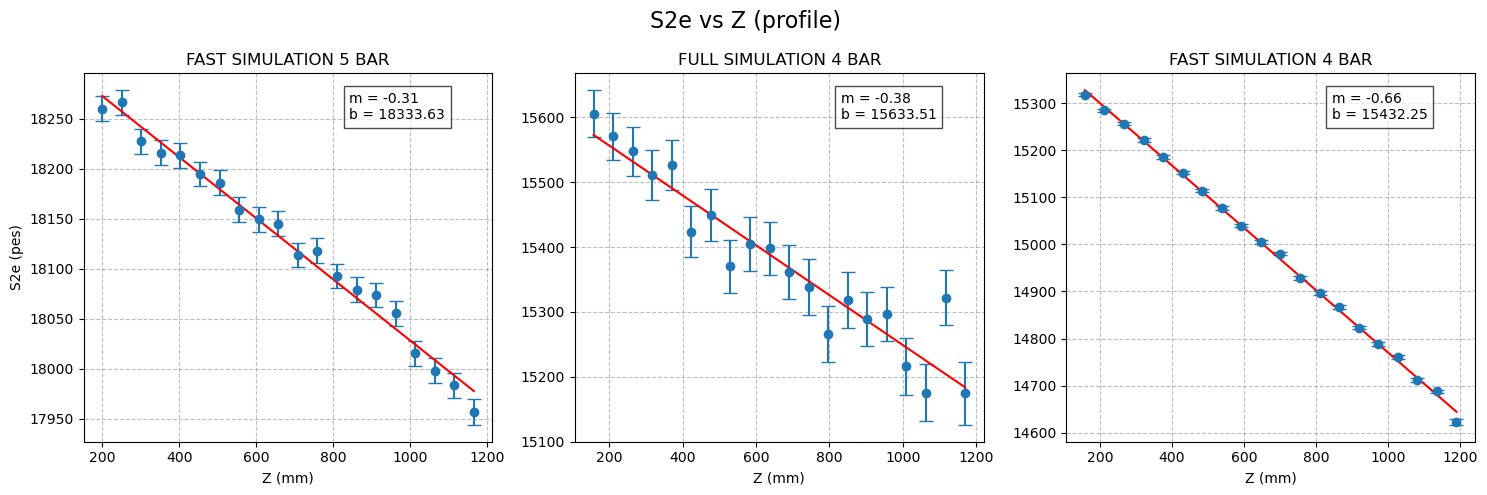

In [74]:
sim1_filtrado = sim1[sim1['DT'] > 200]
sim2_filtrado = sim2[sim2['DT'] > 150]
fast_filtrado = fast[fast['DT'] > 150]

# Crear subfiguras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Lista para guardar m y b
parametros_lineales = []

# Graficar primera subfigura
bin_centers, mean_S2e, std_S2e, fit_line, m, b = plot_profile(sim1_filtrado['Z'], sim1_filtrado['S2e'])
ax1.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax1.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
ax1.set_xlabel('Z (mm)')
ax1.set_ylabel('S2e (pes)')
ax1.set_title(titulos[0])
# ax1.legend()
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax1.text(0.65, 0.95, f"m = {m:.2f}\nb = {b:.2f}", transform=ax1.transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
parametros_lineales.append((m, b))

# Graficar segunda subfigura
bin_centers, mean_S2e, std_S2e, fit_line, m, b = plot_profile(sim2_filtrado['Z'], sim2_filtrado['S2e'])
ax2.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax2.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
ax2.set_xlabel('Z (mm)')
#ax2.set_ylabel('S2e (pes)')
ax2.set_title(titulos[1])
# ax2.legend()
ax2.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax2.text(0.65, 0.95, f"m = {m:.2f}\nb = {b:.2f}", transform=ax2.transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
parametros_lineales.append((m, b))

# Tercera figura
bin_centers, mean_S2e, std_S2e, fit_line, m, b = plot_profile(fast_filtrado['Z'], fast_filtrado['S2e'])
ax3.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax3.plot(bin_centers, fit_line, 'r-', label=f"Ajuste lineal: y = {m:.2f}x + {b:.2f}")
ax3.set_xlabel('Z (mm)')
#ax3.set_ylabel('S2e (pes)')
ax3.set_title(titulos[2])
# ax3.legend()
ax3.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax3.text(0.65, 0.95, f"m = {m:.2f}\nb = {b:.2f}", transform=ax3.transAxes,
         verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
parametros_lineales.append((m, b))

# Espaciado
fig.suptitle('S2e vs Z (profile)', fontsize=16)
plt.tight_layout()

# Lista final con los parámetros
for i, (m, b) in enumerate(parametros_lineales):
    print(f"{titulos[i]}: m = {m:.4f}, b = {b:.2f}")

## Profile $y=E_0\cdot e^{-DT/\tau}$ 

In [76]:
def exp_decay(DT, E0, tau):
    return E0 * np.exp(-DT / tau)

In [77]:
def plot_profile_2(Z, S2e):
    num_bins = 20
    bins = np.linspace(Z.min(), Z.max(), num_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2

    mean_S2e, std_S2e = [], []

    for i in range(num_bins):
        mask = (Z >= bins[i]) & (Z < bins[i + 1])
        S2e_in_bin = S2e[mask]
        
        if len(S2e_in_bin) > 0:
            mean_S2e.append(np.mean(S2e_in_bin))
            std_S2e.append(np.std(S2e_in_bin) / np.sqrt(len(S2e_in_bin)))
        else:
            mean_S2e.append(np.nan)
            std_S2e.append(np.nan)

    bin_centers = np.array(bin_centers)
    mean_S2e = np.array(mean_S2e)
    std_S2e = np.array(std_S2e)
    valid_mask = ~np.isnan(mean_S2e)

    # Ajuste exponencial
    popt, pcov = curve_fit(
        exp_decay,
        bin_centers[valid_mask],
        mean_S2e[valid_mask],
        sigma=std_S2e[valid_mask],
        absolute_sigma=True,
        p0=[np.max(mean_S2e[valid_mask]), (Z.max() - Z.min()) / 2],
        bounds=([0, 1e-3], [np.inf, np.inf])
    )

    E0, tau = popt
    fit_line = exp_decay(bin_centers, *popt)

    return bin_centers, mean_S2e, std_S2e, fit_line, E0, tau, pcov

In [78]:
sim1.Z/sim1.DT


#Como ver esto en el experimento

0         0.87
1         0.87
2         0.87
3         0.87
4         0.87
          ... 
988925    0.87
988926    0.87
988927    0.87
988928    0.87
988929    0.87
Length: 988706, dtype: float64

tau_sim1 = 83024.81 ± 2531.53
tau_sim2 = 53385.34 ± 4051.21
tau_fast_sim = 28563.85 ± 108.00


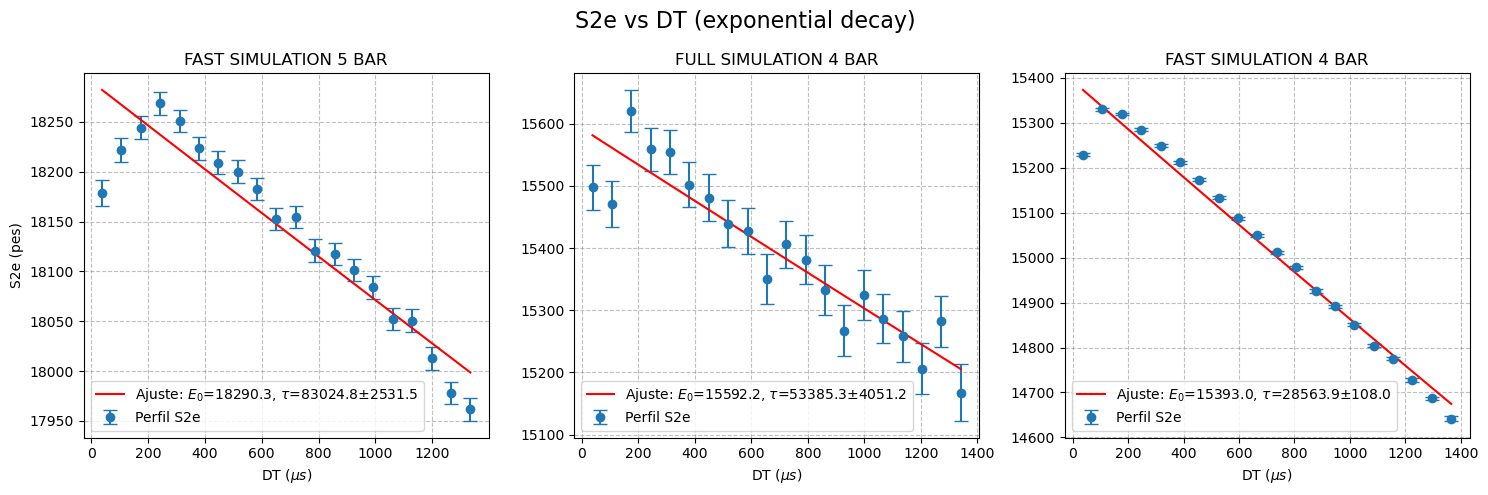

In [79]:
# Crear subfiguras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Primera subfigura
bin_centers, mean_S2e, std_S2e, fit_line, E0, tau, pcov1 = plot_profile_2(sim1['DT'], sim1['S2e'])
s_tau = np.sqrt(pcov1[1, 1])
print(f"tau_sim1 = {tau:.2f} ± {s_tau:.2f}")

ax1.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax1.plot(bin_centers, fit_line, 'r-', label=f"Ajuste: $E_0$={E0:.1f}, $\\tau$={tau:.1f}±{s_tau:.1f}")
ax1.set_xlabel('DT ($\\mu s$)')
ax1.set_ylabel('S2e (pes)')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Segunda subfigura
bin_centers, mean_S2e, std_S2e, fit_line, E0, tau, pcov2 = plot_profile_2(sim2['DT'], sim2['S2e'])
s_tau = np.sqrt(pcov2[1, 1])
print(f"tau_sim2 = {tau:.2f} ± {s_tau:.2f}")

ax2.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax2.plot(bin_centers, fit_line, 'r-', label=f"Ajuste: $E_0$={E0:.1f}, $\\tau$={tau:.1f}±{s_tau:.1f}")
ax2.set_xlabel('DT ($\\mu s$)')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Tercera subfigura
bin_centers, mean_S2e, std_S2e, fit_line, E0, tau, pcov3 = plot_profile_2(fast['DT'], fast['S2e'])
s_tau = np.sqrt(pcov3[1, 1])
print(f"tau_fast_sim = {tau:.2f} ± {s_tau:.2f}")

ax3.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax3.plot(bin_centers, fit_line, 'r-', label=f"Ajuste: $E_0$={E0:.1f}, $\\tau$={tau:.1f}±{s_tau:.1f}")
ax3.set_xlabel('DT ($\\mu s$)')
ax3.legend()
ax3.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

ax1.set_title(titulos[0])
ax2.set_title(titulos[1])
ax3.set_title(titulos[2])

# Espaciado
fig.suptitle('S2e vs DT (exponential decay)', fontsize=16)
plt.tight_layout()


tau_sim1 = 68406.63 ± 2122.16
E0_sim1  = 18334.29 ± 7.05
tau_sim2 = 45585.26 ± 3495.74
E0_sim2  = 15638.38 ± 20.92
tau_fast_sim = 26284.41 ± 107.60
E0_fast_sim  = 15434.13 ± 1.88


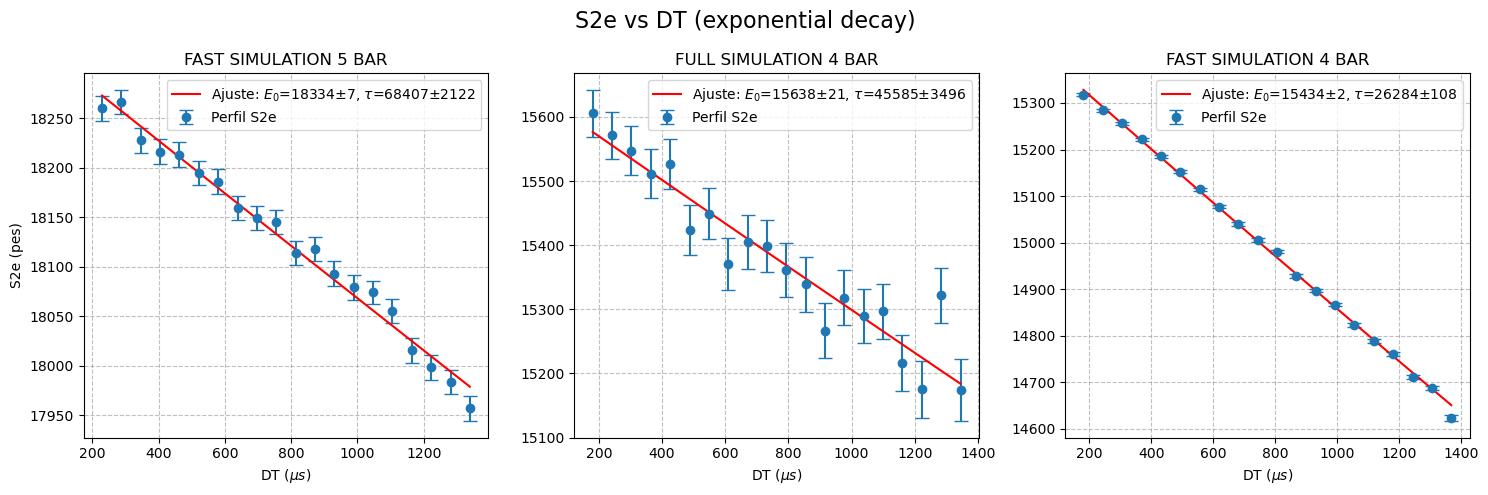

In [80]:
# Crear subfiguras
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# --- Primera subfigura (DT > 200)
sim1_filtrado = sim1[sim1['DT'] > 200]
bin_centers, mean_S2e, std_S2e, fit_line, E0_sim1, tau_sim1, pcov1 = plot_profile_2(sim1_filtrado['DT'], sim1_filtrado['S2e'])
s_E0_sim1 = np.sqrt(pcov1[0, 0])
s_tau_sim1 = np.sqrt(pcov1[1, 1])
print(f"tau_sim1 = {tau_sim1:.2f} ± {s_tau_sim1:.2f}")
print(f"E0_sim1  = {E0_sim1:.2f} ± {s_E0_sim1:.2f}")

ax1.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax1.plot(bin_centers, fit_line, 'r-', label=f"Ajuste: $E_0$={E0_sim1:.0f}±{s_E0_sim1:.0f}, $\\tau$={tau_sim1:.0f}±{s_tau_sim1:.0f}")
ax1.set_xlabel('DT ($\\mu s$)')
ax1.set_ylabel('S2e (pes)')
ax1.legend()
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# --- Segunda subfigura (DT > 150)
sim2_filtrado = sim2[sim2['DT'] > 150]
bin_centers, mean_S2e, std_S2e, fit_line, E0_sim2, tau_sim2, pcov2 = plot_profile_2(sim2_filtrado['DT'], sim2_filtrado['S2e'])
s_E0_sim2 = np.sqrt(pcov2[0, 0])
s_tau_sim2 = np.sqrt(pcov2[1, 1])
print(f"tau_sim2 = {tau_sim2:.2f} ± {s_tau_sim2:.2f}")
print(f"E0_sim2  = {E0_sim2:.2f} ± {s_E0_sim2:.2f}")

ax2.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax2.plot(bin_centers, fit_line, 'r-', label=f"Ajuste: $E_0$={E0_sim2:.0f}±{s_E0_sim2:.0f}, $\\tau$={tau_sim2:.0f}±{s_tau_sim2:.0f}")
ax2.set_xlabel('DT ($\\mu s$)')
ax2.legend()
ax2.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# --- Tercera subfigura (DT > 150)
fast_filtrado = fast[fast['DT'] > 150]
bin_centers, mean_S2e, std_S2e, fit_line, E0_fast_sim, tau_fast_sim, pcov3 = plot_profile_2(fast_filtrado['DT'], fast_filtrado['S2e'])
s_E0_fast = np.sqrt(pcov3[0, 0])
s_tau_fast = np.sqrt(pcov3[1, 1])
print(f"tau_fast_sim = {tau_fast_sim:.2f} ± {s_tau_fast:.2f}")
print(f"E0_fast_sim  = {E0_fast_sim:.2f} ± {s_E0_fast:.2f}")

ax3.errorbar(bin_centers, mean_S2e, yerr=std_S2e, fmt='o', capsize=5, label="Perfil S2e")
ax3.plot(bin_centers, fit_line, 'r-', label=f"Ajuste: $E_0$={E0_fast_sim:.0f}±{s_E0_fast:.0f}, $\\tau$={tau_fast_sim:.0f}±{s_tau_fast:.0f}")
ax3.set_xlabel('DT ($\\mu s$)')
ax3.legend()
ax3.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

ax1.set_title(titulos[0])
ax2.set_title(titulos[1])
ax3.set_title(titulos[2])

# Espaciado
fig.suptitle('S2e vs DT (exponential decay)', fontsize=16)
plt.tight_layout()

In [81]:
print("Incertidumbres (std_S2e) de la tercera gráfica:")
for i, (x, y, dy) in enumerate(zip(bin_centers, mean_S2e, std_S2e)):
    print(f"Bin {i:2d}: DT = {x:.1f}, S2e = {y:.1f} ± {dy:.2f}")

Incertidumbres (std_S2e) de la tercera gráfica:
Bin  0: DT = 181.3, S2e = 15318.1 ± 3.20
Bin  1: DT = 243.8, S2e = 15284.6 ± 3.26
Bin  2: DT = 306.3, S2e = 15256.2 ± 3.26
Bin  3: DT = 368.8, S2e = 15221.9 ± 3.33
Bin  4: DT = 431.3, S2e = 15185.7 ± 3.35
Bin  5: DT = 493.8, S2e = 15152.7 ± 3.44
Bin  6: DT = 556.3, S2e = 15114.2 ± 3.46
Bin  7: DT = 618.8, S2e = 15077.4 ± 3.53
Bin  8: DT = 681.3, S2e = 15039.8 ± 3.55
Bin  9: DT = 743.8, S2e = 15005.5 ± 3.63
Bin 10: DT = 806.3, S2e = 14980.5 ± 3.62
Bin 11: DT = 868.8, S2e = 14928.7 ± 3.73
Bin 12: DT = 931.3, S2e = 14896.5 ± 3.73
Bin 13: DT = 993.8, S2e = 14866.6 ± 3.80
Bin 14: DT = 1056.3, S2e = 14823.3 ± 3.82
Bin 15: DT = 1118.8, S2e = 14789.1 ± 3.90
Bin 16: DT = 1181.3, S2e = 14760.7 ± 3.89
Bin 17: DT = 1243.8, S2e = 14711.8 ± 3.99
Bin 18: DT = 1306.3, S2e = 14687.6 ± 3.98
Bin 19: DT = 1368.8, S2e = 14622.8 ± 6.43


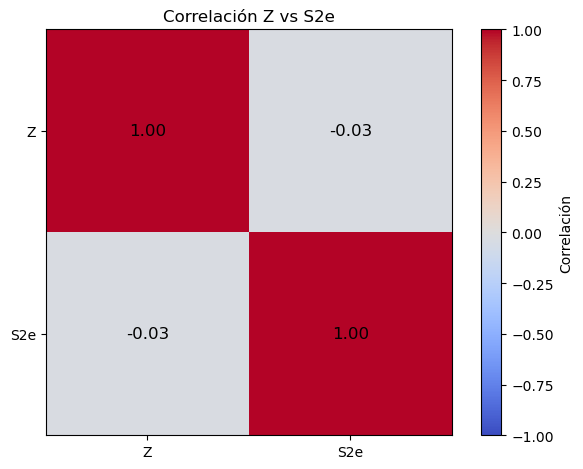

In [82]:
corr_matrix = np.corrcoef(sim1["Z"], sim1["S2e"])

# Cuadrícula de colores
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

plt.colorbar(label='Correlación')
plt.xticks([0, 1], ['Z', 'S2e'])
plt.yticks([0, 1], ['Z', 'S2e'])
plt.title('Correlación Z vs S2e')

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{corr_matrix[i, j]:.2f}',
                 ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()

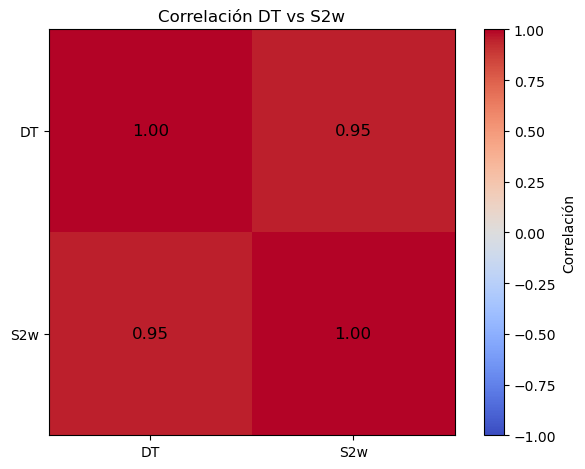

In [83]:
corr_matrix = np.corrcoef(sim1["DT"], sim1["S2w"])

# Cuadrícula de colores
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

plt.colorbar(label='Correlación')
plt.xticks([0, 1], ['DT', 'S2w'])
plt.yticks([0, 1], ['DT', 'S2w'])
plt.title('Correlación DT vs S2w')

for i in range(2):
    for j in range(2):
        plt.text(j, i, f'{corr_matrix[i, j]:.2f}',
                 ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()

## Correción de la energia

In [85]:
# corregir la energia crear columna E_p (predecir) = E_0*e^{DT/tau}; para corregir el life time S2e/(E_0*e^{DT/tau}) y plot 

In [86]:
# hacerlo en 2d pq es mas visual

In [87]:
# # Seleccionar una muestra aleatoria de 10 000 puntos (o menos)
# subset = fast_filtrado.sample(10000, random_state=0)

# DT = subset["DT"]
# S2e = subset["S2e"]

# E_p = E0_fast_sim * np.exp(DT / tau_fast_sim)
# E_c = S2e / E_p

# # Filtrado por seguridad
# mask_finite = np.isfinite(E_p) & np.isfinite(E_c)
# DT = DT[mask_finite]
# S2e = S2e[mask_finite]
# E_p = E_p[mask_finite]
# E_c = E_c[mask_finite]
# # --- Graficar todo frente a DT ---
# fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# # S2e vs DT
# axs[0].scatter(DT, S2e, s=10, alpha=0.6)
# axs[0].set_ylabel('S2e (pes)')
# axs[0].set_title('S2e vs DT')
# axs[0].grid(True)

# # E_p vs DT
# axs[1].plot(DT, E_p, color='green', label='E_p (esperada)')
# axs[1].set_ylabel('E_p')
# axs[1].set_title('Energía esperada vs DT')
# axs[1].grid(True)

# # E_c vs DT
# axs[2].scatter(DT, E_c, s=10, alpha=0.6, color='orange', label='E_c')
# axs[2].set_ylabel('E_c = S2e / E_p')
# axs[2].set_xlabel('DT')
# axs[2].set_title('Energía corregida vs DT')
# axs[2].grid(True)

# plt.tight_layout()

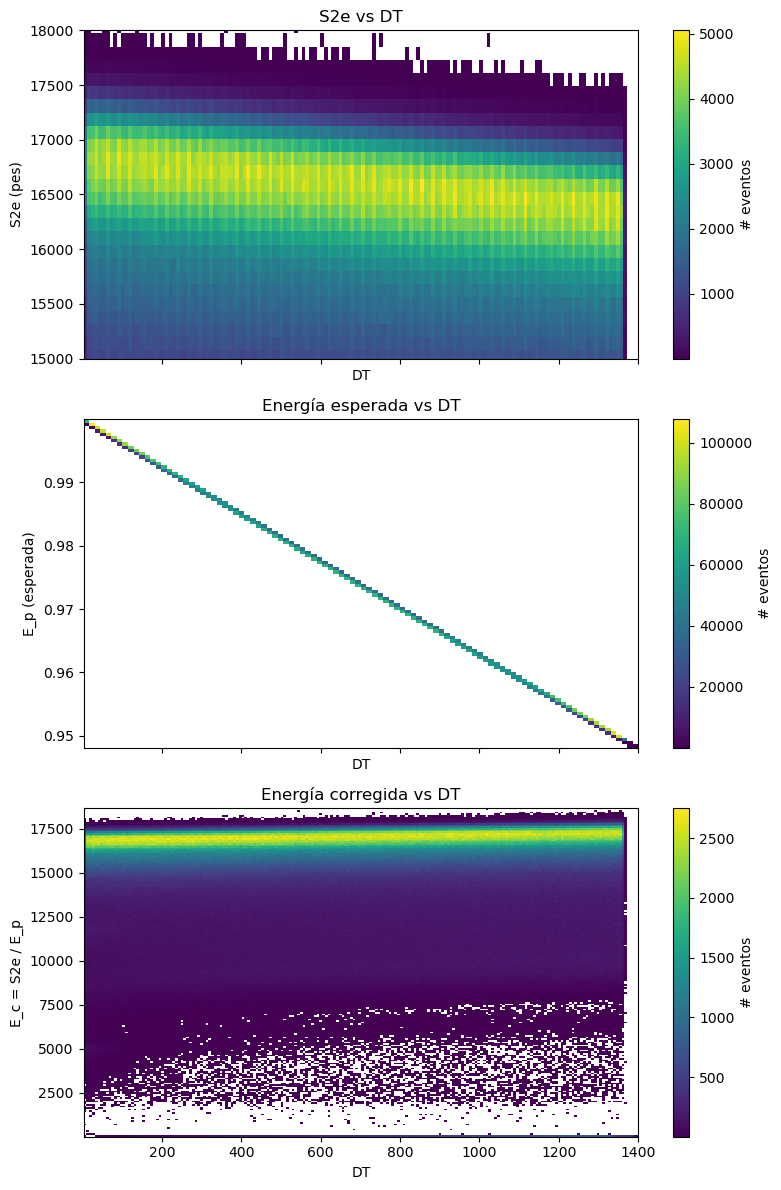

In [88]:
# --- Datos completos ---
DT = fast["DT"]
S2e = fast["S2e"]

# --- Calcular E_p y E_c ---
E_p = np.exp(-DT / tau_fast_sim)
E_c = (S2e) / E_p

# --- Gráficas 2D ---
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Histograma 2D: S2e vs DT
h1 = axs[0].hist2d(DT, S2e, bins=[150,150], cmin=1)
axs[0].set_ylabel("S2e (pes)")
axs[0].set_title("S2e vs DT")
axs[0].set_xlabel("DT")
axs[0].set_ylim(15000,18000)
plt.colorbar(h1[3], ax=axs[0], label="# eventos")

# Histograma 2D: E_p vs DT
h2 = axs[1].hist2d(DT, E_p, bins=100, cmin=1)
axs[1].set_ylabel("E_p (esperada)")
axs[1].set_title("Energía esperada vs DT")
axs[1].set_xlabel("DT")
plt.colorbar(h2[3], ax=axs[1], label="# eventos")

# Histograma 2D: E_c vs DT
h3 = axs[2].hist2d(DT, E_c, bins=200, cmin=1)
axs[2].set_ylabel("E_c = S2e / E_p")
axs[2].set_xlabel("DT")
axs[2].set_title("Energía corregida vs DT")
plt.colorbar(h3[3], ax=axs[2], label="# eventos")

plt.tight_layout()

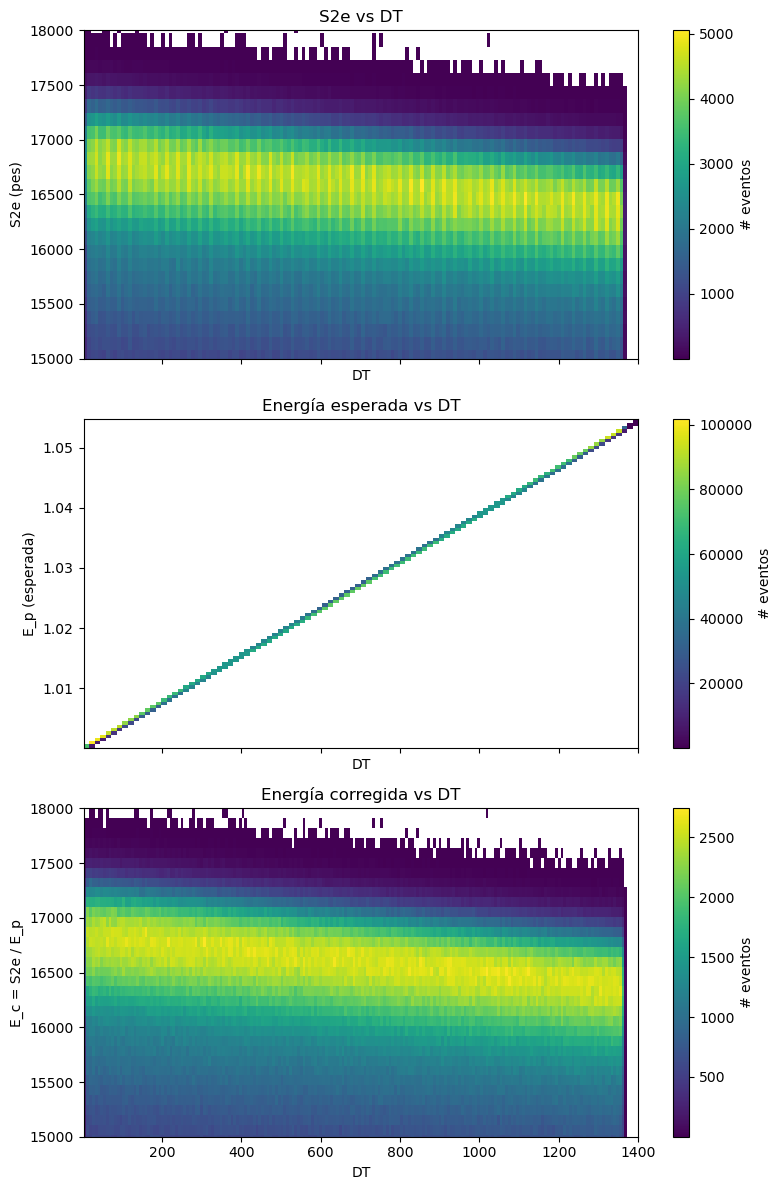

In [89]:
# --- Datos completos ---
DT = fast["DT"]
S2e = fast["S2e"]

# --- Calcular E_p y E_c ---
E_p = np.exp(DT / tau_fast_sim)
E_c = (S2e) / E_p
S2e_corr= E0_fast_sim * E_p
# --- Gráficas 2D ---
fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# Histograma 2D: S2e vs DT
h1 = axs[0].hist2d(DT, S2e, bins=[150,150], cmin=1)
axs[0].set_ylabel("S2e (pes)")
axs[0].set_title("S2e vs DT")
axs[0].set_xlabel("DT")
axs[0].set_ylim(15000,18000)
plt.colorbar(h1[3], ax=axs[0], label="# eventos")

# Histograma 2D: E_p vs DT
h2 = axs[1].hist2d(DT, E_p, bins=100, cmin=1)
axs[1].set_ylabel("E_p (esperada)")
axs[1].set_title("Energía esperada vs DT")
axs[1].set_xlabel("DT")
plt.colorbar(h2[3], ax=axs[1], label="# eventos")

# Histograma 2D: E_c vs DT
h3 = axs[2].hist2d(DT, S2e, bins=200, cmin=1)
axs[2].set_ylabel("E_c = S2e / E_p")
axs[2].set_xlabel("DT")
axs[2].set_title("Energía corregida vs DT")
plt.colorbar(h3[3], ax=axs[2], label="# eventos")
axs[2].set_ylim(15000,18000)

plt.tight_layout()

# 3

## S2q vs DT

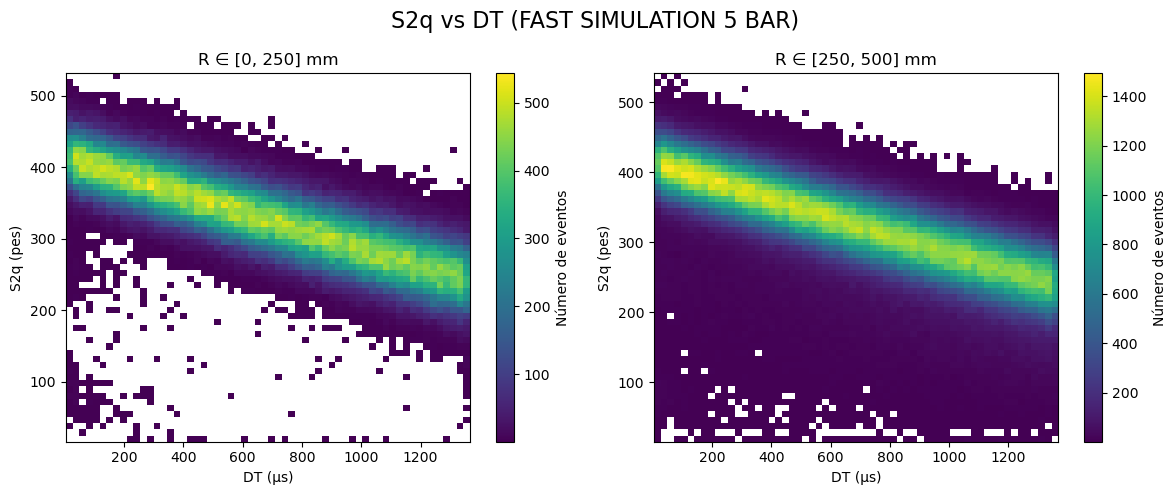

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer histograma: R en [0, 250] mm
h1 = axes[0].hist2d(sim1_250['DT'], sim1_250['S2q'], bins=60, cmin=1)
axes[0].set_xlabel('DT (µs)')
axes[0].set_ylabel('S2q (pes)')
axes[0].set_title("R ∈ [0, 250] mm")
cbar1 = plt.colorbar(h1[3], ax=axes[0])
cbar1.set_label('Número de eventos')

# Segundo histograma: R en [250, 500] mm
h2 = axes[1].hist2d(sim1_500['DT'], sim1_500['S2q'], bins=60, cmin=1)
axes[1].set_xlabel('DT (µs)')
axes[1].set_ylabel('S2q (pes)')
axes[1].set_title("R ∈ [250, 500] mm")
cbar2 = plt.colorbar(h2[3], ax=axes[1])
cbar2.set_label('Número de eventos')

fig.suptitle(f'S2q vs DT ({titulos[0]})', fontsize=16)
plt.tight_layout()

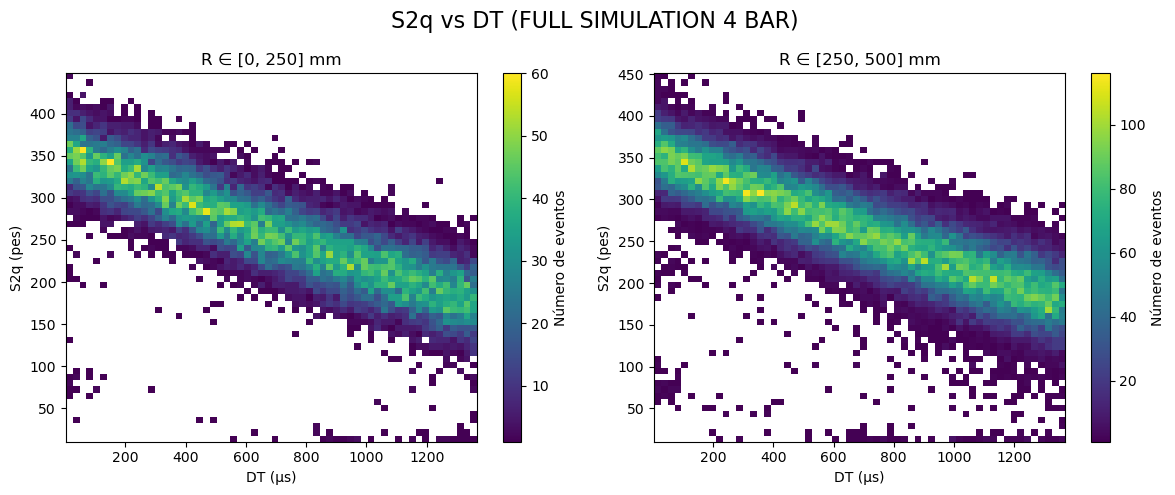

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer histograma: R en [0, 250] mm
h1 = axes[0].hist2d(sim2_250['DT'], sim2_250['S2q'], bins=60, cmin=1)
axes[0].set_xlabel('DT (µs)')
axes[0].set_ylabel('S2q (pes)')
axes[0].set_title("R ∈ [0, 250] mm")
cbar1 = plt.colorbar(h1[3], ax=axes[0])
cbar1.set_label('Número de eventos')

# Segundo histograma: R en [250, 500] mm
h2 = axes[1].hist2d(sim2_500['DT'], sim2_500['S2q'], bins=60, cmin=1)
axes[1].set_xlabel('DT (µs)')
axes[1].set_ylabel('S2q (pes)')
axes[1].set_title("R ∈ [250, 500] mm")
cbar2 = plt.colorbar(h2[3], ax=axes[1])
cbar2.set_label('Número de eventos')

fig.suptitle(f'S2q vs DT ({titulos[1]})', fontsize=16)
plt.tight_layout()
# profile

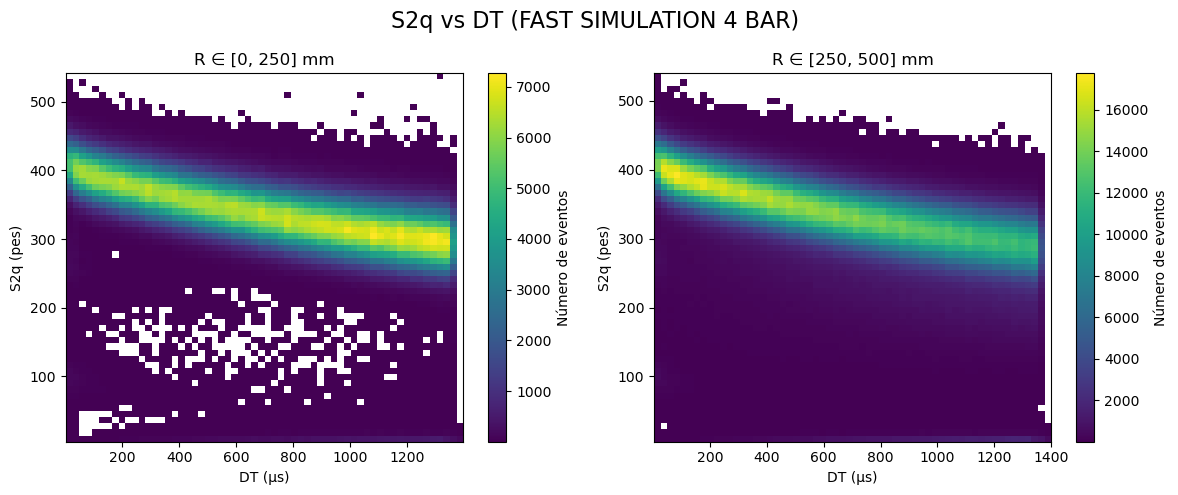

In [94]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer histograma: R en [0, 250] mm
h1 = axes[0].hist2d(fast_250['DT'], fast_250['S2q'], bins=60, cmin=1)
axes[0].set_xlabel('DT (µs)')
axes[0].set_ylabel('S2q (pes)')
axes[0].set_title("R ∈ [0, 250] mm")
cbar1 = plt.colorbar(h1[3], ax=axes[0])
cbar1.set_label('Número de eventos')

# Segundo histograma: R en [250, 500] mm
h2 = axes[1].hist2d(fast_500['DT'], fast_500['S2q'], bins=60, cmin=1)
axes[1].set_xlabel('DT (µs)')
axes[1].set_ylabel('S2q (pes)')
axes[1].set_title("R ∈ [250, 500] mm")
cbar2 = plt.colorbar(h2[3], ax=axes[1])
cbar2.set_label('Número de eventos')

fig.suptitle(f'S2q vs DT ({titulos[2]})', fontsize=16)
plt.tight_layout()

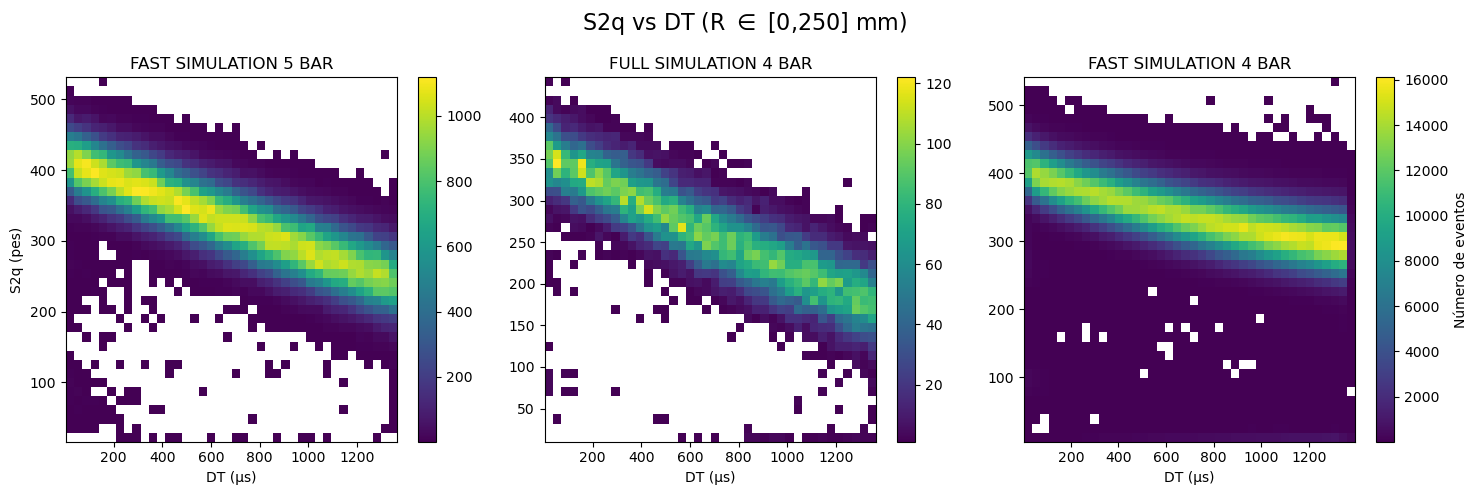

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación 1
h1 = axes[0].hist2d(sim1_250['DT'], sim1_250['S2q'], bins=[40, 40], cmin=1)
cbar1 = fig.colorbar(h1[3], ax=axes[0])  
axes[0].set_xlabel('DT (µs)')
axes[0].set_ylabel('S2q (pes)')

# Segunda gráfica: Simulación 2
h2 = axes[1].hist2d(sim2_250['DT'], sim2_250['S2q'], bins=[40, 40], cmin=1)
cbar2 = fig.colorbar(h2[3], ax=axes[1]) 
axes[1].set_xlabel('DT (µs)')

# Tercera gráfica: Fast
h3 = axes[2].hist2d(fast_250['DT'], fast_250['S2q'], bins=[40, 40], cmin=1)
cbar3 = fig.colorbar(h3[3], ax=axes[2])  
axes[2].set_xlabel('DT (µs)')

# Etiqueta de la barra de color solo para el último gráfico
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar el diseño para evitar solapamientos
fig.suptitle('S2q vs DT (R $\\in$ [0,250] mm)', fontsize=16)
plt.tight_layout()

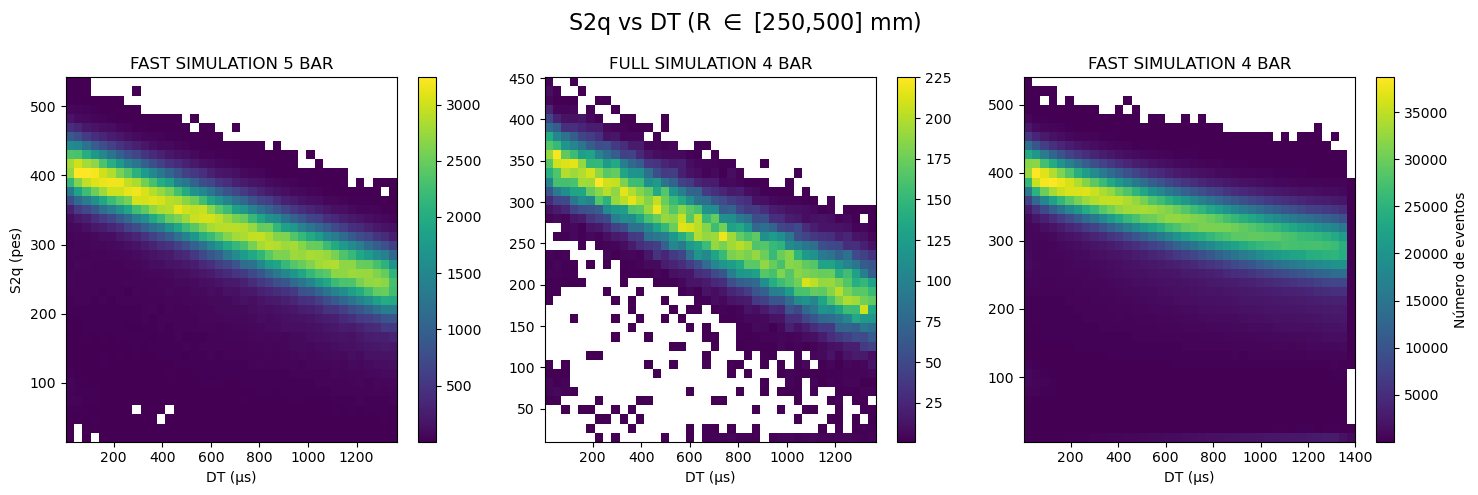

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación 1
h1 = axes[0].hist2d(sim1_500['DT'], sim1_500['S2q'], bins=[40, 40], cmin=1)
cbar1 = fig.colorbar(h1[3], ax=axes[0])  
axes[0].set_xlabel('DT (µs)')
axes[0].set_ylabel('S2q (pes)')

# Segunda gráfica: Simulación 2
h2 = axes[1].hist2d(sim2_500['DT'], sim2_500['S2q'], bins=[40, 40], cmin=1)
cbar2 = fig.colorbar(h2[3], ax=axes[1]) 
axes[1].set_xlabel('DT (µs)')

# Tercera gráfica: Fast
h3 = axes[2].hist2d(fast_500['DT'], fast_500['S2q'], bins=[40, 40], cmin=1)
cbar3 = fig.colorbar(h3[3], ax=axes[2])  
axes[2].set_xlabel('DT (µs)')

# Etiqueta de la barra de color solo para el último gráfico
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar el diseño para evitar solapamientos
fig.suptitle('S2q vs DT (R $\\in$ [250,500] mm)', fontsize=16)
plt.tight_layout()

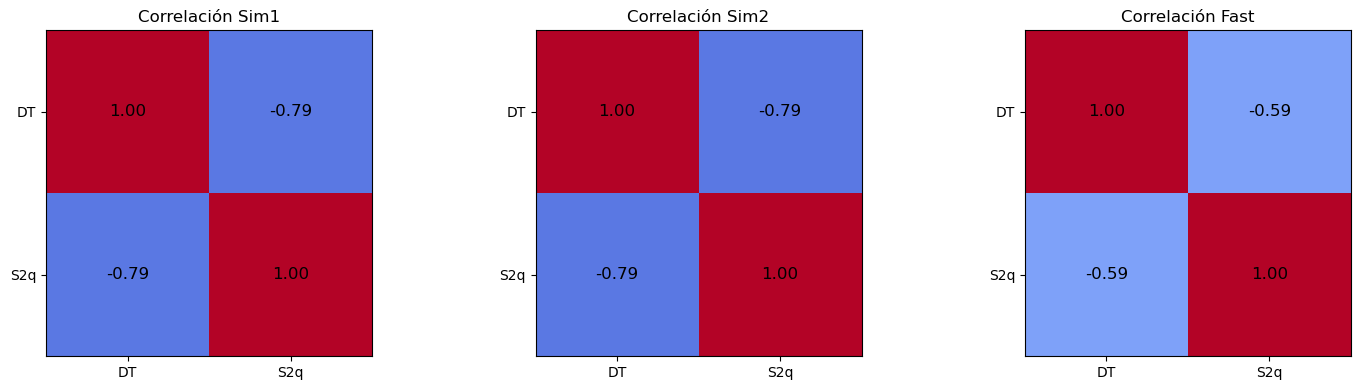

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
datasets = [(sim1, "Sim1"), (sim2, "Sim2"), (fast, "Fast")]

ims = []
for ax, (data, title) in zip(axs, datasets):
    corr_matrix = np.corrcoef(data["DT"], data["S2q"])
    im = ax.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
    ims.append(im)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['DT', 'S2q'])
    ax.set_yticklabels(['DT', 'S2q'])
    ax.set_title(f'Correlación {title}')
    ax.grid(False)

    # Agregar texto con los valores
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=12)

# cbar = fig.colorbar(ims[0], ax=axs, orientation='horizontal', fraction=0.05, pad=0.2)
# cbar.set_label('Correlación')

plt.tight_layout()

## S2w vs R

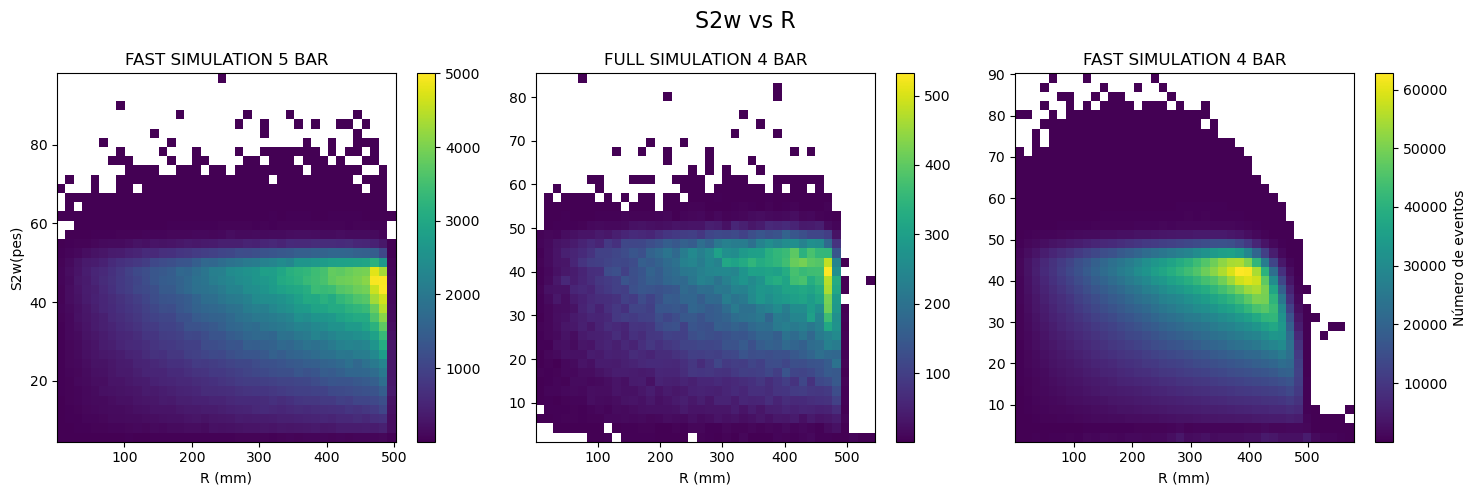

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación 1
h1 = axes[0].hist2d(sim1['R'], sim1['S2w'], bins=[40, 40], cmin=1)
cbar1 = fig.colorbar(h1[3], ax=axes[0])  
axes[0].set_xlabel('R (mm)')
axes[0].set_ylabel('S2w(pes)')

# Segunda gráfica: Simulación 2
h2 = axes[1].hist2d(sim2['R'], sim2['S2w'], bins=[40, 40], cmin=1)
cbar2 = fig.colorbar(h2[3], ax=axes[1]) 
axes[1].set_xlabel('R (mm)')

# Tercera gráfica: Fast
h3 = axes[2].hist2d(fast['R'], fast['S2w'], bins=[40, 40], cmin=1)
cbar3 = fig.colorbar(h3[3], ax=axes[2])  
axes[2].set_xlabel('R (mm)')

# Etiqueta de la barra de color solo para el último gráfico
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar el diseño para evitar solapamientos
fig.suptitle('S2w vs R', fontsize=16)
plt.tight_layout()

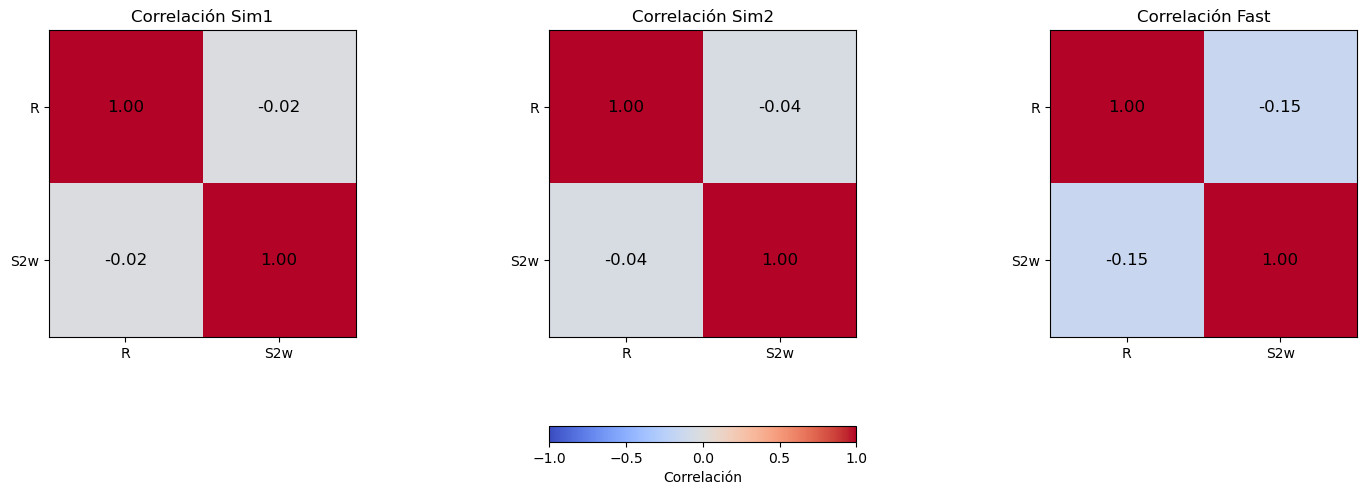

In [100]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
datasets = [(sim1, "Sim1"), (sim2, "Sim2"), (fast, "Fast")]

ims = []
for ax, (data, title) in zip(axs, datasets):
    corr_matrix = np.corrcoef(data["R"], data["S2w"])
    im = ax.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
    ims.append(im)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['R', 'S2w'])
    ax.set_yticklabels(['R', 'S2w'])
    ax.set_title(f'Correlación {title}')
    ax.grid(False)

    # Agregar texto con los valores
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=12)

cbar = fig.colorbar(ims[0], ax=axs, orientation='horizontal', fraction=0.05, pad=0.2)
cbar.set_label('Correlación')

## S2e vs R

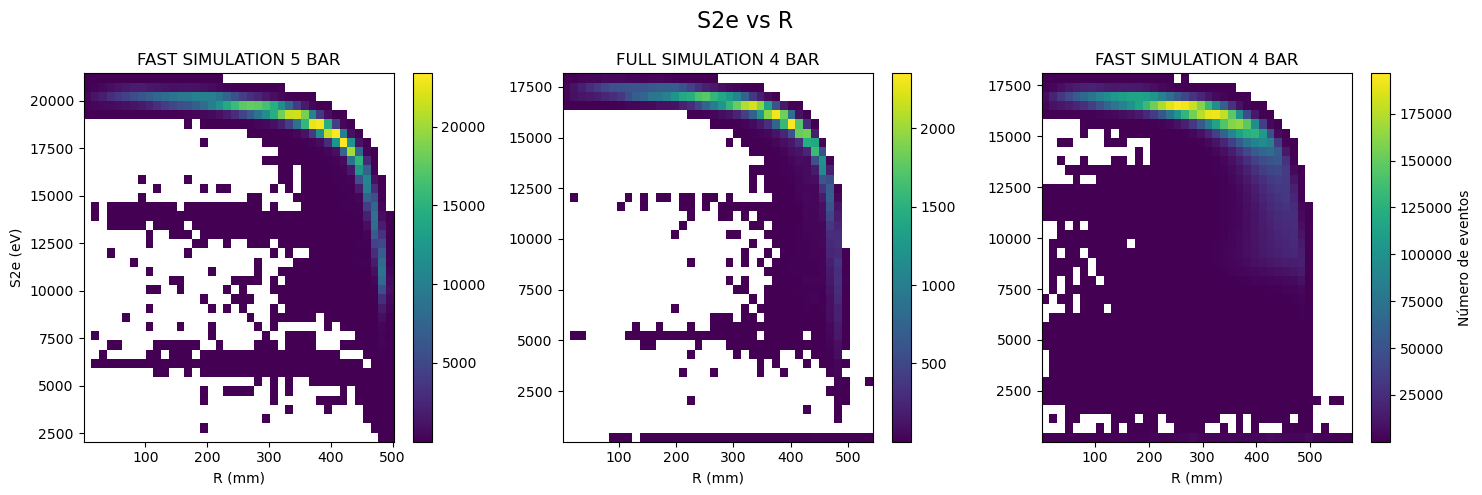

In [102]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Primera gráfica: Simulación 1
h1 = axes[0].hist2d(sim1['R'], sim1['S2e'], bins=[40, 40], cmin=1)
cbar1 = fig.colorbar(h1[3], ax=axes[0])  
axes[0].set_xlabel('R (mm)')
axes[0].set_ylabel('S2e (eV)')

# Segunda gráfica: Simulación 2
h2 = axes[1].hist2d(sim2['R'], sim2['S2e'], bins=[40, 40], cmin=1)
cbar2 = fig.colorbar(h2[3], ax=axes[1]) 
axes[1].set_xlabel('R (mm)')

# Tercera gráfica: Fast
h3 = axes[2].hist2d(fast['R'], fast['S2e'], bins=[40, 40], cmin=1)
cbar3 = fig.colorbar(h3[3], ax=axes[2])  
axes[2].set_xlabel('R (mm)')

# Etiqueta de la barra de color solo para el último gráfico
cbar3.set_label('Número de eventos')

axes[0].set_title(titulos[0])
axes[1].set_title(titulos[1])
axes[2].set_title(titulos[2])

# Ajustar el diseño para evitar solapamientos
fig.suptitle('S2e vs R', fontsize=16)
plt.tight_layout()

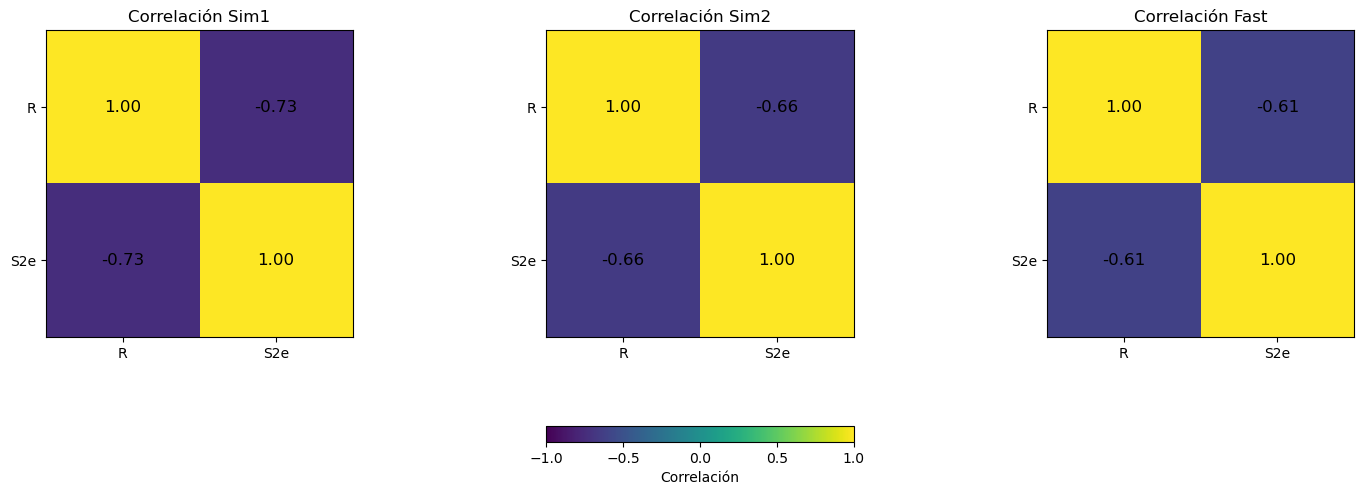

In [103]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)
datasets = [(sim1, "Sim1"), (sim2, "Sim2"), (fast, "Fast")]

ims = []
for ax, (data, title) in zip(axs, datasets):
    corr_matrix = np.corrcoef(data["R"], data["S2e"])
    im = ax.imshow(corr_matrix, vmin=-1, vmax=1)
    ims.append(im)

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['R', 'S2e'])
    ax.set_yticklabels(['R', 'S2e'])
    ax.set_title(f'Correlación {title}')
    ax.grid(False)

    # Agregar texto con los valores
    for i in range(2):
        for j in range(2):
            ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha='center', va='center', color='black', fontsize=12)

cbar = fig.colorbar(ims[0], ax=axs, orientation='horizontal', fraction=0.05, pad=0.2)
cbar.set_label('Correlación')

# Toy experiment

In [105]:
# generar datos con un E_O y tau (toy experiments), reajustarlos a E_0' y t' , (tau'(de cada fit)-tau_0(fijado))/sigma para cemntrarla en 0 y ancura 1
# size=10000

E0 ajustado = 15434.56 ± 0.45
tau ajustado = 26186.05 ± 69.22


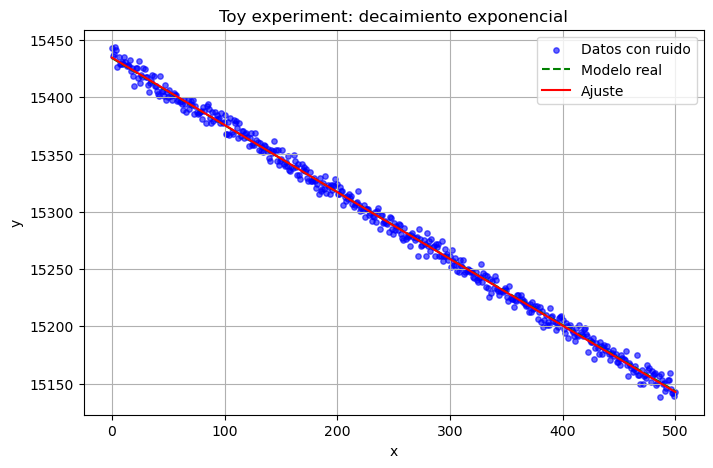

In [106]:
# Parámetros verdaderos
E0_verdadero = E0_fast_sim
tau_verdadero = tau_fast_sim

# Modelo teórico
def modelo_decay(x, E0, tau):
    return E0 * np.exp(-x / tau)

# Generar datos sintéticos
np.random.seed(0)
x_datos = np.linspace(0, 500, 500)
y_ideal = modelo_decay(x_datos, E0_verdadero, tau_verdadero)
ruido = np.random.normal(0, 5, size=x_datos.size)
y_observado = y_ideal + ruido

# Ajuste del modelo a los datos ruidosos
param_opt, cov = curve_fit(modelo_decay, x_datos, y_observado, p0=[90, 4])
E0_ajustado, tau_ajustado = param_opt
errores = np.sqrt(np.diag(cov))

# Visualización
plt.figure(figsize=(8, 5))
plt.scatter(x_datos, y_observado, label='Datos con ruido', color='blue', alpha=0.6, s=15)
plt.plot(x_datos, y_ideal, label='Modelo real', linestyle='--', color='green')
plt.plot(x_datos, modelo_decay(x_datos, *param_opt), label='Ajuste', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Toy experiment: decaimiento exponencial')
plt.legend()
plt.grid(True)

# Resultados del ajuste
print(f"E0 ajustado = {E0_ajustado:.2f} ± {errores[0]:.2f}")
print(f"tau ajustado = {tau_ajustado:.2f} ± {errores[1]:.2f}")

In [107]:
# sigma_s2e vs DT R 200 mm y anillos

100%|██████████| 10000/10000 [00:05<00:00, 1998.95it/s]


E0 medio: 15434.09 ± 9.52
tau medio: 26381.64 ± 1512.97
E_{0} = 15443.2
$\tau_{0} = 24317.59 \pm 1284.82$
E_{1} = 15406.5
$\tau_{1} = 30573.90 \pm 1976.48$
E_{2} = 15444.0
$\tau_{2} = 25141.94 \pm 1329.24$


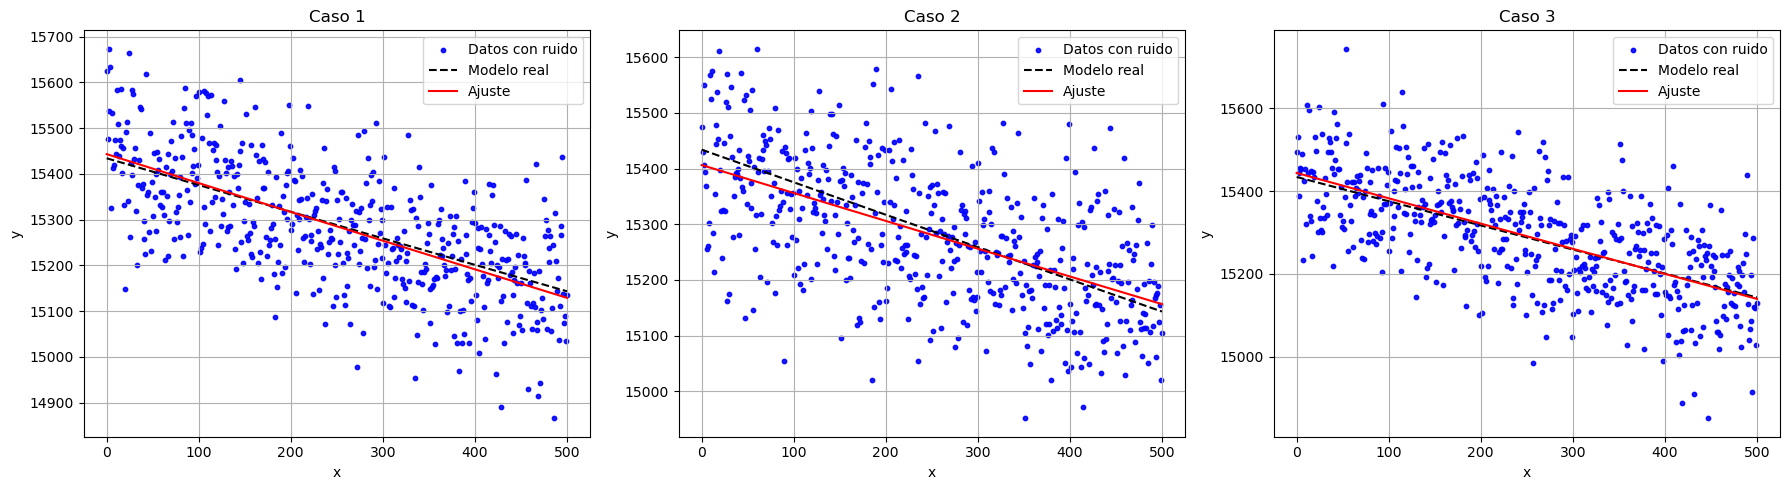

In [238]:
# Generar datos sintéticos
x_datos = np.linspace(0, 500, 500)
y_ideal = modelo_decay(x_datos, E0_verdadero, tau_verdadero)
size = 10000
ruido_sigma = 107.60

# Arreglos para guardar resultados
E0s = np.zeros(size)
taus = np.zeros(size)
s_taus = np.zeros(size)

# Guardar 3 curvas ejemplo
ejemplos_x = []
ejemplos_y = []
ejemplos_ajuste = []

np.random.seed(0)
for i in tqdm(range(size)):
    ruido = np.random.normal(0, ruido_sigma, size=x_datos.size)
    y_obs = y_ideal + ruido
    try:
        popt, pcov = curve_fit(modelo_decay, x_datos, y_obs, p0=[90, 4])
        E0s[i], taus[i] = popt
        s_taus[i] = np.sqrt(np.abs(pcov[1, 1]))  # puede que la cov. sea negativa por inestabilidad numérica
        if i < 3:
            ejemplos_x.append(x_datos.copy())
            ejemplos_y.append(y_obs.copy())
            ejemplos_ajuste.append(modelo_decay(x_datos, *popt))
    except RuntimeError:
        E0s[i], taus[i], s_taus[i] = np.nan, np.nan, np.nan


# Filtramos resultados válidos
E0s = E0s[~np.isnan(E0s)]
taus = taus[~np.isnan(taus)]

# Estadísticas
print(f"E0 medio: {np.mean(E0s):.2f} ± {np.std(E0s):.2f}")
print(f"tau medio: {np.mean(taus):.2f} ± {np.std(taus):.2f}")

# Graficar 3 casos individuales
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
    axs[i].scatter(ejemplos_x[i], ejemplos_y[i], label='Datos con ruido', color='blue', s=10, alpha=0.9)
    axs[i].plot(x_datos, y_ideal, '--', label='Modelo real', color='black')
    axs[i].plot(x_datos, ejemplos_ajuste[i], label='Ajuste', color='red')
    axs[i].set_title(f'Caso {i+1}')
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].legend()
    axs[i].grid(True)
    print(f"E_{{{i}}} = {E0s[i]:.1f}")
    print(f"$\\tau_{{{i}}} = {taus[i]:.2f} \\pm {s_taus[i]:.2f}$")

plt.tight_layout()
plt.savefig("graficas/toy experiment")

In [109]:
# # Suponiendo que `taus` es un array con los taus ajustados anteriormente
# print(f"tau_fast_sim = {tau_fast_sim:.2f}")
# print("Comparación con taus[i]:")

# for i, tau_i in enumerate(taus):
#     print(f"tau_{{{i}}} = {tau_i:.2f}  ->   Δ = {tau_i - tau_verdadero:.2f}")

In [110]:
# ver la correlación entre datos 

In [111]:
# plot(E_o, tau) para ver su correlacion

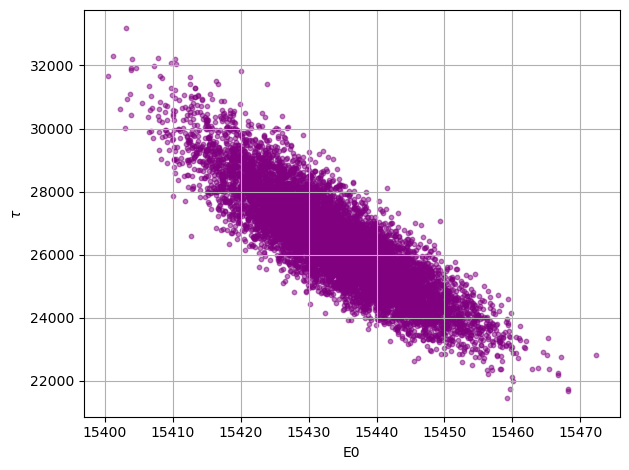

In [112]:
plt.scatter(E0s, taus, alpha=0.5, s=10, color='purple')
plt.xlabel('E0')
plt.ylabel('$\\tau$')
plt.grid(True)
plt.tight_layout()

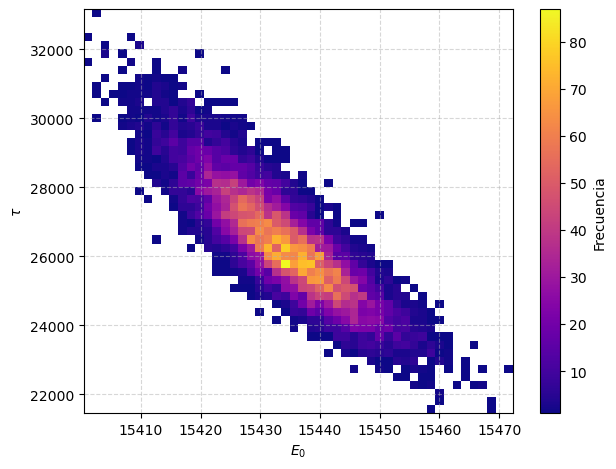

In [113]:
plt.hist2d(E0s, taus, bins=50, cmap='plasma', cmin=1)
plt.xlabel('$E_0$')
plt.ylabel(r'$\tau$')
plt.colorbar(label='Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()


Media de pulls: -0.048244
Desviación estándar de pulls: 0.997850


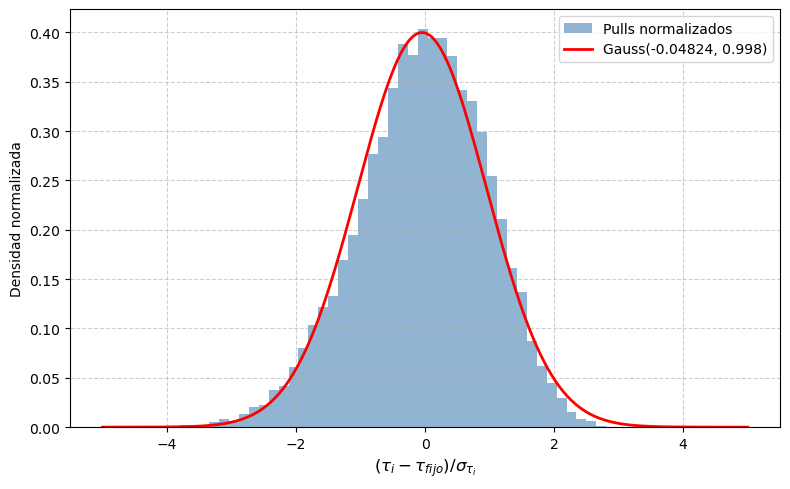

In [114]:
# --- Valor fijo ---
tau_fijo = tau_fast_sim

# --- Pulls normalizados ---
z = (taus - tau_fijo) / s_taus

# --- Media y desviación de los pulls ---
mu_z = np.mean(z)
sigma_z = np.std(z)
print(f"Media de pulls: {mu_z:.6f}")
print(f"Desviación estándar de pulls: {sigma_z:.6f}")

# --- Histograma ---
fig, ax = plt.subplots(figsize=(8, 5))
counts, bins, _ = ax.hist(z, bins=50, density=True, alpha=0.6, color='steelblue', label='Pulls normalizados')

# --- Gaussiana empírica ---
x_vals = np.linspace(-5, 5, 500)
gauss_fit = norm.pdf(x_vals, loc=mu_z, scale=sigma_z)
ax.plot(x_vals, gauss_fit, 'r-', lw=2, label=fr'Gauss({mu_z:.5f}, {sigma_z:.3f})')

# --- Etiquetas y estilo ---
ax.set_xlabel('$(\\tau_i - \\tau_{fijo})/\\sigma_{\\tau_i}$', fontsize=12)
ax.set_ylabel('Densidad normalizada')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
plt.tight_layout()

Media de pulls: 97.230
Desviación estándar de pulls: 1512.971


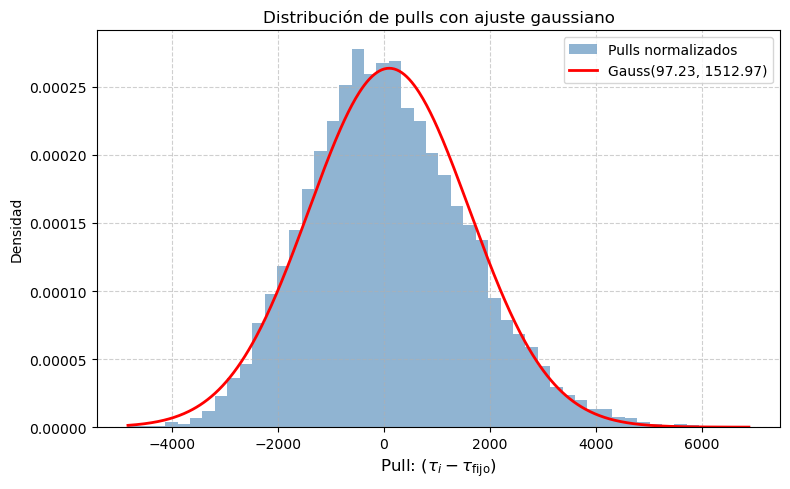

In [115]:
tau_fijo = tau_fast_sim

# --- Pulls normalizados ---
z = (taus - tau_fijo)

# --- Media y desviación de los pulls ---
mu_z = np.mean(z)
sigma_z = np.std(z)
print(f"Media de pulls: {mu_z:.3f}")
print(f"Desviación estándar de pulls: {sigma_z:.3f}")

# --- Histograma ---
fig, ax = plt.subplots(figsize=(8, 5))
counts, bins, _ = ax.hist(z, bins=50, density=True, alpha=0.6, color='steelblue', label='Pulls normalizados')

# --- Gaussiana empírica ---
x_vals = np.linspace(min(z), max(z), 500)
gauss_fit = norm.pdf(x_vals, loc=mu_z, scale=sigma_z)
ax.plot(x_vals, gauss_fit, 'r-', lw=2, label=fr'Gauss({mu_z:.2f}, {sigma_z:.2f})')

# --- Etiquetas y estilo ---
ax.set_xlabel(r'Pull: $(\tau_i - \tau_{\mathrm{fijo}})$', fontsize=12)
ax.set_ylabel('Densidad')
ax.set_title('Distribución de pulls con ajuste gaussiano')
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()
plt.tight_layout()

In [116]:
sim1.Z/sim1.DT

0         0.87
1         0.87
2         0.87
3         0.87
4         0.87
          ... 
988925    0.87
988926    0.87
988927    0.87
988928    0.87
988929    0.87
Length: 988706, dtype: float64

In [117]:
# sim 1 fast sim 5 bar
# sim 2 full sim 4 bar
# sim 3 fast sim 4 bar

In [118]:
# sigma S2e vs DT disferentes anillos <300 mm

In [119]:
# corregir los ajustes de los profiles para R<300 mm

In [120]:
# dinsidad de eventos del S1 vs Z para varios radios